<a href="https://colab.research.google.com/github/gcochlar/Bootcamp_DataScience/blob/main/Bootcamp_Mod1_SD_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://drive.google.com/uc?id=16O9eMrtSeRDnDpZgmneXj34eIClCntvg">

# **Analisando Dados da Saúde com Python e Pandas**
---
---

Este *notebook* foi desenvolvido como trabalho de conclusão do primeiro módulo do ***Bootcamp de Data Science Aplicada*** realizado pela **Alura** em maio de 2021.

Vamos trabalhar com dados de produção hospitalar gerados a partir do Portal da Saúde do Governo Federal  ([DataSUS](http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi)).

A ideia é avaliar os gastos das diversas Unidades da Federação (UFs) e procurar identificar indicadores que sirvam para comparar de forma adequada o uso das verbas pelas UFs.



## Importação de Bibliotecas e Parametrizações Iniciais
---
Vamos iniciar importando as diversas bibliotecas que usaremos ao longo desse *notebook* e realizando algumas configurações de parâmetros gerais que serão igualmente úteis.

In [1]:
#Biblioteca de Análise de Dados
import pandas as pd
import random
import numpy as np

#Bibliotecas de Criação de Visualizações Gráficas
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Patch
import seaborn as sns
#import plotly.graph_objects as go
#import plotly.express as px

#Bibliotecas de Apresentação de Informações no Google Colab
from google.colab import widgets, output
#import warnings

#Ignorar Avisos do Python
#warnings.filterwarnings('ignore')

#Formatando a exibição de números
pd.options.display.float_format = '{:,.2f}'.format

#Criando atalhos para usar cores nos textos
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   ITALIC = '\033[3m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

## Importação e Preparação de Dados
---
Como citado anteriormente, nossos dados foram extraídos da base do DataSUS. Os dados disponíveis apresentam uma quebra no ano de 2008, data em que foi feita uma atualização dos sistemas do SUS. Vamos trabalhar apenas com os dados posteriores a 2008, para garantir uniformidade de critérios.

Para garantir que os dados não sofrerão atualizações com o passar do tempo, os dados obtidos foram carregados para o repositório do **GitHub**, de onde faremos a importação.

In [2]:
url_atendimento_UF='https://github.com/gcochlar/Bootcamp_DataScience/raw/main/dados/BaseDadosDataSUS-Estado-Atendimento.csv'

Chama a atenção o fato de que o DataSUS nos permite obter os dados por data de processamento ou por data de atendimento. Para entender a diferença, vamos recorrer às notas técnicas disponíveis no site ([link](http://tabnet.datasus.gov.br/cgi/sih/Proced_hosp_loc_int_2008.pdf)).

---
><img src='https://drive.google.com/uc?id=1uhv1jT44o50Vpyhj8JRC_wKRazL8Q1zN'>

---

Como queremos entender a evolução no tempo do que está sendo efetivamente realizado, essa diferença de conceito nos traz alguns pontos de alerta que precisam ser observados:
* podemos ter valores referentes a uma internação processada em 2008 que foi efetivamente realizada em anos anteriores e foi apresentada pela UF responsável em atraso ou foi rejeitada, corrigida e reapresentada, por exemplo;
* é grande a probabilidade dos dados mais recentes ainda estarem sendo alterados. O próprio site informa que os dados dos últimos 6 meses são passíveis de atualização.

Sendo assim, devemos trabalhar com os **dados por data de atendimento**, pois a data de processamento envolve questões burocráticas que podem causar descompassos entre a ocorrências dos fatos e a data dos dados.


In [3]:
df_atends=pd.read_csv(url_atendimento_UF,
                      encoding='ISO-8859-1',
                      engine='python',
                      skiprows=3,
                      skipfooter=12,
                      sep=';',thousands='.', decimal=',',
                      index_col=0
                      ).drop('Total',axis=1)

In [4]:
guias = widgets.TabBar(['Estrutura', 'Registros Iniciais','Registros Finais'], location='top')

with guias.output_to('Estrutura'):
    print(color.BOLD+color.UNDERLINE+color.DARKCYAN+
          '\nEstrutura da Base de Dados:\n'+color.END)
    print(df_atends.info())
    print('\n')
    print(df_atends.shape)
with guias.output_to('Registros Iniciais'):
    display(df_atends.head())
with guias.output_to('Registros Finais'):
    display(df_atends.tail())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Estrutura da Base de Dados:

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 11 Rondônia to 53 Distrito Federal
Columns: 282 entries, 1992/Mar to 2021/Mar
dtypes: float64(159), object(123)
memory usage: 59.7+ KB
None


(27, 282)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Abr,2000/Mai,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"8,159,737.49","8,457,455.71","7,766,983.20","8,858,845.57","8,407,076.44","9,492,938.92","8,206,195.92","9,011,612.58","9,124,967.84","8,406,732.72","8,411,360.02","8,651,081.66","8,193,425.99","8,388,269.45","8,645,315.78","9,050,329.13","9,211,262.51","9,490,545.02","8,600,886.20","8,919,190.86","8,909,111.89","8,409,386.09","8,924,348.41","8,948,605.66","8,660,753.05","8,327,665.97","8,431,334.62","7,251,287.20","7,490,440.60","8,957,706.45","10,993,332.84","10,479,989.36","11,433,467.56","8,876,900.39","8,167,253.19","8,759,013.71","9,003,402.23","8,414,690.60","6,039,419.59","4,732,441.04"
12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"2,638,773.92","2,968,168.75","2,769,797.39","3,057,631.96","2,874,965.31","3,175,575.17","3,060,903.21","3,253,011.61","3,040,645.05","2,926,179.27","3,126,120.64","2,473,454.85","2,277,493.49","2,594,347.32","2,234,388.36","2,473,008.49","2,979,764.77","3,070,533.95","3,249,052.69","3,567,538.64","2,981,072.98","2,998,860.31","3,293,378.97","3,174,249.43","2,959,569.09","3,276,790.55","2,985,763.71","2,939,675.20","2,672,857.33","2,940,827.86","3,914,823.86","4,053,085.41","3,658,265.59","3,470,409.45","3,267,918.69","3,393,958.27","3,711,660.71","3,005,561.16","2,272,733.90","1,137,341.65"
13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"13,635,186.02","14,549,450.86","12,753,555.36","14,749,409.47","14,577,930.81","15,381,061.96","14,653,650.77","15,544,595.79","16,374,961.41","15,343,340.93","16,249,963.61","14,255,408.82","14,274,053.94","15,358,914.00","14,100,074.56","16,103,971.89","16,154,491.82","16,529,976.06","15,509,984.83","16,642,220.71","16,493,719.52","15,351,607.47","16,339,427.95","14,821,977.50","14,965,815.90","15,982,353.42","15,166,470.82","14,815,958.58","16,379,386.07","19,625,325.21","18,433,057.47","19,303,743.16","18,687,233.58","18,628,627.49","18,728,251.20","20,451,573.77","21,546,059.48","24,439,059.57","13,679,358.06","6,799,060.80"
14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"2,688,315.70","2,740,952.07","2,478,349.44","2,674,958.94","2,721,261.19","2,844,811.66","2,967,161.35","2,841,587.97","3,328,230.63","2,878,691.04","2,964,324.32","2,524,712.40","2,462,451.64","2,662,240.18","2,499,996.16","2,846,135.56","2,789,823.29","2,839,389.53","2,647,540.20","2,865,777.71","3,181,321.82","3,070,436.96","3,162,342.44","3,121,104.71","2,889,969.87","3,084,561.08","2,967,159.04","2,813,954.05","2,306,119.95","2,921,522.16","3,300,012.98","3,192,075.41","3,262,354.34","2,978,629.22","3,313,296.78","3,527,263.23","3,125,021.90","3,209,323.68","3,044,798.77","2,381,844.31"
15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"32,067,934.67","33,615,836.09","30,623,491.62","34,121,931.00","35,039,954.20","35,424,611.06","34,160,283.18","34,484,949.49","35,618,364.04","34,380,916.90","38,441,090.50","33,583,538.08","32,789,354.87","34,513,534.80","31,885,919.67","33,236,155.79","31,

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Abr,2000/Mai,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
43 Rio Grande do Sul,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,873.76,244.65,...,"82,737,574.48","91,825,671.54","77,582,012.38","91,078,325.19","91,926,773.80","91,678,131.98","90,989,887.85","94,861,008.10","96,799,643.23","87,344,269.09","97,371,100.06","90,190,767.67","81,748,880.30","92,467,100.02","85,301,000.44","91,624,338.70","92,787,953.22","99,143,937.75","95,862,593.49","103,044,767.94","98,566,147.88","94,371,567.58","96,973,500.30","91,006,554.37","88,764,855.22","97,614,085.43","85,488,519.32","84,881,491.62","76,806,748.32","87,777,332.11","96,799,361.58","108,536,525.93","111,762,290.19","110,107,867.30","113,886,837.47","116,738,266.69","116,833,971.73","102,317,646.36","84,404,640.00","37,798,832.80"
50 Mato Grosso do Sul,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"15,040,368.93","16,146,431.63","14,703,494.87","16,969,878.14","17,062,906.92","17,068,192.56","17,143,032.30","17,435,039.90","18,239,321.45","16,963,131.37","17,677,185.62","16,363,926.26","16,149,109.15","16,902,636.63","16,964,922.58","17,259,392.23","18,147,562.63","19,143,242.28","17,905,638.97","18,126,954.44","19,217,982.14","18,904,364.43","18,812,185.96","18,316,480.80","17,844,511.04","18,654,501.49","17,877,667.41","17,395,566.03","15,854,121.13","17,502,042.14","19,724,932.28","23,639,938.85","22,608,351.55","21,519,151.07","21,825,003.22","21,418,665.16","21,387,005.58","16,027,788.65","11,428,462.42","4,035,989.77"
51 Mato Grosso,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"14,473,688.30","15,578,896.35","14,592,428.67","17,252,931.32","15,921,801.14","16,732,272.17","16,075,073.71","16,479,008.11","16,011,187.69","15,357,273.96","16,834,151.93","15,474,405.82","14,234,942.30","15,055,383.98","14,478,906.98","15,976,701.25","16,026,760.63","17,304,334.81","16,131,820.19","16,467,803.96","16,532,335.42","15,596,133.69","16,564,324.20","15,122,951.39","13,839,763.36","15,546,808.82","14,460,507.38","14,493,916.52","12,187,688.07","14,675,991.52","18,546,814.06","20,681,571.71","20,936,140.39","20,176,196.43","20,387,936.40","18,316,623.02","18,852,854.81","15,890,528.31","13,207,979.82","8,835,890.09"
52 Goiás,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"32,418,887.65","33,774,725.23","30,951,957.24","34,889,685.12","33,793,945.19","36,429,187.65","33,535,245.30","35,400,045.71","35,408,697.61","33,813,397.64","36,064,816.74","34,904,539.36","34,092,381.28","34,795,831.02","33,292,972.66","34,964,737.78","36,236,325.32","37,829,806.86","35,400,944.86","36,502,552.32","38,533,573.53","36,415,308.03","37,217,715.53","36,302,392.68","34,078,918.26","36,432,399.98","34,248,522.76","34,808,037.62","28,760,754.83","35,104,476.04","38,888,207.13","45,871,329.20","47,568,155.41","47,951,326.80","45,304,843.74","39,785,408.90","37,614,253.55","35,655,886.73","32,253,788.65","24,867,001.02"
53 Distrito Federal,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"16,038,710.79","18,976,846.56","18,389,240.38","19,746,542.97","19,508,159.58","19,463,16

<IPython.core.display.Javascript object>

Podemos ver que ocorreu a importação das 27 UFs distribuídas nas linhas, como era esperado. No entanto temos 283 colunas, sendo 159 do tipo *float* (números) e 124 do tipo *string*. Além disso, temos dados de períodos muito anteriores a janeiro de 2008, que foi o solicitado.

Voltando na parte conceitual das notas técnicas, podemos entender que apesar de termos solicitado os dados de atendimento posteriores a 2008, o TabNet seleciona os dados processados a partir de janeiro de 2008, mesmo que sejam referentes a atendimentos ocorridos em períodos anteriores. O que acontece é que nessa seleção tendo a data de atendimento como critério, os dados são distribuídos nas colunas de acordo com a data de atendimento, mas são selecionados da base pela data de processamento.

O primeiro passo para verificarmos o que será de possível utilização é convertermos tudo para o tipo numérico, o que é feito abaixo.

In [5]:
df_atends = df_atends.replace('-', np.nan)
df_atends = df_atends.astype('float64')
df_atends.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 282 entries, 1992/Mar to 2021/Mar
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   11 Rondônia             159 non-null    float64
 1   12 Acre                 162 non-null    float64
 2   13 Amazonas             160 non-null    float64
 3   14 Roraima              159 non-null    float64
 4   15 Pará                 164 non-null    float64
 5   16 Amapá                160 non-null    float64
 6   17 Tocantins            162 non-null    float64
 7   21 Maranhão             168 non-null    float64
 8   22 Piauí                163 non-null    float64
 9   23 Ceará                164 non-null    float64
 10  24 Rio Grande do Norte  163 non-null    float64
 11  25 Paraíba              171 non-null    float64
 12  26 Pernambuco           176 non-null    float64
 13  27 Alagoas              163 non-null    float64
 14  28 Sergipe              165 non-nul

Podemos observar que os dois estados que apresentam as menores quantidades de colunas válidas são Rondônia e Roraima, com 159 colunas válidas.

Vamos verificar se os dados válidos estão nos 159 meses mais recentes da base de dados ou se há algum mês com dados faltantes no meio desse intervalo e se esse período contém dados válidos para todas as UFs.

In [6]:
for i in df_atends.index:
    print(i,(22-len(i))*' ',': ',df_atends.loc[i][-159:].isnull().sum(),' dados inválidos.')

11 Rondônia             :  0  dados inválidos.
12 Acre                 :  0  dados inválidos.
13 Amazonas             :  0  dados inválidos.
14 Roraima              :  0  dados inválidos.
15 Pará                 :  0  dados inválidos.
16 Amapá                :  0  dados inválidos.
17 Tocantins            :  0  dados inválidos.
21 Maranhão             :  0  dados inválidos.
22 Piauí                :  0  dados inválidos.
23 Ceará                :  0  dados inválidos.
24 Rio Grande do Norte  :  0  dados inválidos.
25 Paraíba              :  0  dados inválidos.
26 Pernambuco           :  0  dados inválidos.
27 Alagoas              :  0  dados inválidos.
28 Sergipe              :  0  dados inválidos.
29 Bahia                :  0  dados inválidos.
31 Minas Gerais         :  0  dados inválidos.
32 Espírito Santo       :  0  dados inválidos.
33 Rio de Janeiro       :  0  dados inválidos.
35 São Paulo            :  0  dados inválidos.
41 Paraná               :  0  dados inválidos.
42 Santa Cata

In [7]:
df_atends.columns[-159:]

Index(['2008/Jan', '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai', '2008/Jun',
       '2008/Jul', '2008/Ago', '2008/Set', '2008/Out',
       ...
       '2020/Jun', '2020/Jul', '2020/Ago', '2020/Set', '2020/Out', '2020/Nov',
       '2020/Dez', '2021/Jan', '2021/Fev', '2021/Mar'],
      dtype='object', length=159)

Podemos concluir, então, que temos 159 meses de dados completos para todas as UFs de nossa base no período de 2008/Jan até 2021/Mar. Como vimos anteriormente, os dados de 2021 ainda estão sendo processados e devem sofrer alterações.

Em função disso, iremos limitar nosso estudo ao período entre 2008/Jan e 2020/Dez.

Vamos excluir de nossa base as colunas desnecessárias e começar a visualizar os dados que temos.

In [8]:
df_atends.drop(df_atends.columns[:123],axis=1,inplace=True)
df_atends.drop(df_atends.columns[-3:],axis=1,inplace=True)

## Análise Preliminar dos Dados

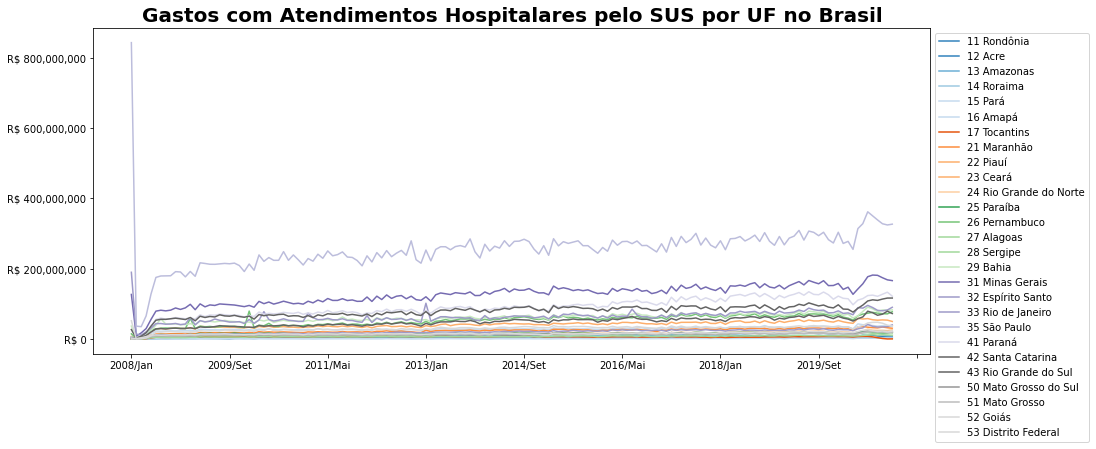

In [9]:
ax=df_atends.T.plot(figsize=(15,6),cmap='tab20c')
ax.legend(bbox_to_anchor=(1,1),
          loc='upper left', ncol=1)
plt.title('Gastos com Atendimentos Hospitalares pelo SUS por UF no Brasil', fontsize=20, fontweight='bold')
ax.yaxis.set_major_formatter(
    ticker.StrMethodFormatter('R$ {x:,.0f}'))

plt.show()

Podemos ver que os dados ainda apresentam uma distorção importante no primeiro mês da série (2008/Jan), que pode ter sido causada por algum tipo de erro na importação dos dados ou por outro fator.

Analisando os dados disponibilizados originalmente podemos ver que os números importados estão de acordo com o que está em nossa base de dados, o que nos leva a conclusão de que a distorção está na base original.

Vale lembrar que o sistema utilizado (DataSUS) passou por modificações no início do ano de 2008, motivo pelo qual as bases disponibilizadas são separadas em dados anteriores e posteriores a 2008. Isso pode ter causado algum tipo de represamento das informações ou até mesmo algum tipo de normalização que envolveu o lançamento de um conjunto maior de dados nos meses iniciais.

O mais provável é que as informações que foram processadas na migração do sistema e que estavam com os dados de data de atendimento incompletos ou inválidos foram "normalizados" para janeiro de 2008, para evitar uma perda maior de dados.

Para evitar distorções, vamos retirar 2008/Jan de nossa base também, ficando assim com 155 meses de dados para o estudo.


In [10]:
df_atends.drop(df_atends.columns[:1],axis=1,inplace=True)

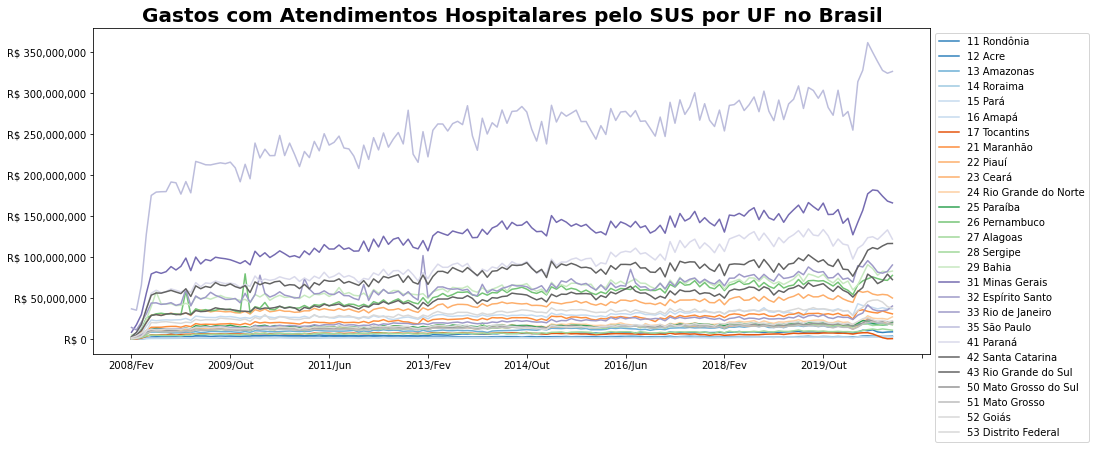

In [11]:
ax=df_atends.T.plot(figsize=(15,6),cmap='tab20c')
ax.legend(bbox_to_anchor=(1,1),
          loc='upper left', ncol=1)
plt.title('Gastos com Atendimentos Hospitalares pelo SUS por UF no Brasil', fontsize=20, fontweight='bold')
ax.yaxis.set_major_formatter(
    ticker.StrMethodFormatter('R$ {x:,.0f}'))

plt.show()

In [12]:
float_formatter = "{:,.2f}".format
np.set_printoptions(
    formatter={'float_kind':float_formatter})

maior_estado=df_atends.sum(axis=1).idxmax()
val_maior_estado=df_atends.loc[maior_estado].sum()

menor_estado=df_atends.sum(axis=1).idxmin()
val_menor_estado=df_atends.loc[menor_estado].sum()

var_maior_menor=(val_maior_estado/val_menor_estado)-1

print(color.BOLD+maior_estado+color.END,': R$','{:,.2f}'.format(val_maior_estado))
print(color.BOLD+menor_estado+color.END,'    : R$   ','{:,.2f}'.format(val_menor_estado))
print(color.BOLD+'Variação     :           ','{:,.2%}'.format(var_maior_menor)+color.END)

35 São Paulo : R$ 39,026,594,921.47
16 Amapá     : R$    299,357,353.31
Variação     :            12,936.79%


A visualização gráfica continua difícil, pois temos 27 UFs e uma grande disparidade de valores, deixando as cores semelhantes e a escala muito próxima para a maioria dos estados.

Vamos visualizar de outra forma, ainda olhando os números de forma totalizada, mas antes disso vamos agrupar as UFs por região geográfica e limpar o nome que ainda contém um código numérico.

In [13]:
df_atends.insert(0,'UF','xxx')
df_atends[['Código UF','UF']]=df_atends.index.str.split(' ',1).tolist()
df_atends=df_atends.reset_index().set_index('UF').drop('Unidade da Federação',axis=1)

df_atends['Região']=df_atends['Código UF'].str[0]

dict_regioes = {'1' : 'Norte', '2' : 'Nordeste',
                '3' : 'Sudeste', '4' : 'Sul',
                '5' : 'Centro-Oeste'}

df_atends['Região']=df_atends['Região'].map(dict_regioes)

df_atends.drop('Código UF',axis=1,inplace=True)

In [14]:
maior_regiao=df_atends.groupby('Região').sum().sum(axis=1).sort_values(ascending=False).idxmax()
val_maior_regiao=df_atends.groupby('Região').sum().sum(axis=1).sort_values(ascending=False)[maior_regiao]
str_maior_regiao='R$ '+'{:,.2f}'.format(val_maior_regiao/1000000)+' MM'

menor_regiao=df_atends.groupby('Região').sum().sum(axis=1).sort_values(ascending=False).idxmin()
val_menor_regiao=df_atends.groupby('Região').sum().sum(axis=1).sort_values(ascending=False)[menor_regiao]
str_menor_regiao='R$ '+'{:,.2f}'.format(val_menor_regiao/1000000)+' MM'

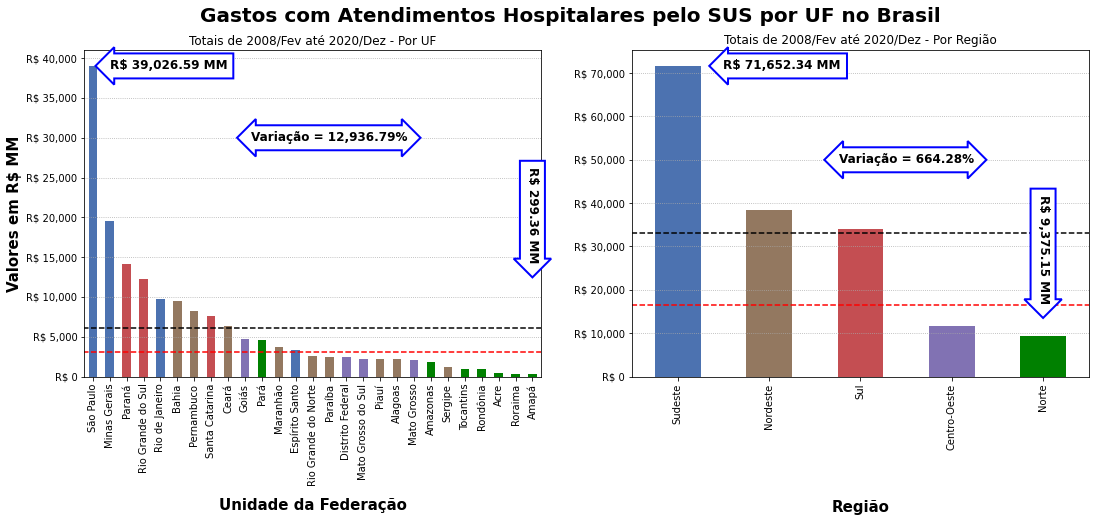

In [15]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,6))
fig.suptitle('Gastos com Atendimentos Hospitalares pelo SUS por UF no Brasil',
             fontsize=20, fontweight='bold')

str_maior_estado='R$ '+'{:,.2f}'.format(val_maior_estado/1000000)+' MM'
str_menor_estado='R$ '+'{:,.2f}'.format(val_menor_estado/1000000)+' MM'
str_var='Variação = '+'{:,.2%}'.format(var_maior_menor)

maior_regiao=df_atends.groupby('Região').sum().sum(axis=1).sort_values(ascending=False).idxmax()
val_maior_regiao=df_atends.groupby('Região').sum().sum(axis=1).sort_values(ascending=False)[maior_regiao]
str_maior_regiao='R$ '+'{:,.2f}'.format(val_maior_regiao/1000000)+' MM'
menor_regiao=df_atends.groupby('Região').sum().sum(axis=1).sort_values(ascending=False).idxmin()
val_menor_regiao=df_atends.groupby('Região').sum().sum(axis=1).sort_values(ascending=False)[menor_regiao]
str_menor_regiao='R$ '+'{:,.2f}'.format(val_menor_regiao/1000000)+' MM'

var_max_min=(val_maior_regiao/val_menor_regiao)-1
str_var2='Variação = '+'{:,.2%}'.format(var_max_min)

#Estabelecer cores das barras das UFs
cores_barras_esq=[]
for i in df_atends.sum(axis=1).sort_values(ascending=False).index:
    if df_atends.loc[i,'Região']=='Sul':
        cores_barras_esq=cores_barras_esq+['#C44E52']
    elif df_atends.loc[i,'Região']=='Sudeste':
        cores_barras_esq=cores_barras_esq+['#4C72B0']
    elif df_atends.loc[i,'Região']=='Nordeste':
        cores_barras_esq=cores_barras_esq+['#937860']
    elif df_atends.loc[i,'Região']=='Centro-Oeste':
        cores_barras_esq=cores_barras_esq+['#8172B3']
    elif df_atends.loc[i,'Região']=='Norte':
        cores_barras_esq=cores_barras_esq+['green']
    else:
        cores_barras_esq=cores_barras_esq+['black']

cores_barras_dir=[]
for i in df_atends.groupby('Região').sum().sum(axis=1).sort_values(ascending=False).index:
    if i=='Sul':
        cores_barras_dir=cores_barras_dir+['#C44E52']
    elif i=='Sudeste':
        cores_barras_dir=cores_barras_dir+['#4C72B0']
    elif i=='Nordeste':
        cores_barras_dir=cores_barras_dir+['#937860']
    elif i=='Centro-Oeste':
        cores_barras_dir=cores_barras_dir+['#8172B3']
    elif i=='Norte':
        cores_barras_dir=cores_barras_dir+['green']
    else:
        cores_barras_dir=cores_barras_dir+['black']


#Gráfico Esquerda
ax1=((df_atends.sum(axis=1).sort_values(
    ascending=False))/1000000).plot(kind='bar', ax=ax1,
                          color=cores_barras_esq)
ax1.set_title('Totais de 2008/Fev até 2020/Dez - Por UF')
ax1.grid(color='darkgrey',linestyle=':',axis='y')
ax1.yaxis.set_major_formatter(
    ticker.StrMethodFormatter('R$ {x:,.0f}'))
ax1.set_xlabel('Unidade da Federação', labelpad=12,
               fontweight='bold', fontsize=15)
ax1.set_ylabel('Valores em R$ MM',fontweight='bold', fontsize=15)
ax1.hlines(y=((df_atends.sum(axis=1).sort_values(ascending=False))/1000000).mean(),
           xmin=-10,xmax=100,color='black', linestyle='--')
ax1.hlines(y=((df_atends.sum(axis=1).sort_values(ascending=False))/1000000).mean()/2,
           xmin=-10,xmax=100,color='red', linestyle='--')

t1_max = ax1.text(
    1, val_maior_estado/1000000, str_maior_estado,
    fontweight='bold', fontsize=12,
    ha='left', va='center',
    bbox=dict(boxstyle='larrow,pad=0.5',
              facecolor='white',ec='blue', lw=2))
t1_min = ax1.text(
    26, val_menor_estado/1000000+20000, str_menor_estado,
    fontweight='bold', fontsize=12,
    rotation=270, ha='center', va='center',
    bbox=dict(boxstyle='rarrow,pad=0.5',
              facecolor='white',ec='blue', lw=2))
t1_var=ax1.text(
    14,30000,str_var, ha='center', va='center',
    fontweight='bold', fontsize=12,
    bbox=dict(
        boxstyle='darrow,pad=0.5',
        facecolor='white',ec='blue',lw=2))

#Gráfico Direita
ax2=((df_atends.groupby('Região').sum().sum(axis=1).sort_values(
    ascending=False))/1000000).plot(kind='bar', ax=ax2,
                          color=cores_barras_dir)
ax2.set_title('Totais de 2008/Fev até 2020/Dez - Por Região')
ax2.grid(color='darkgrey',linestyle=':',axis='y')
ax2.yaxis.set_major_formatter(
    ticker.StrMethodFormatter('R$ {x:,.0f}'))
ax2.set_xlabel('Região', labelpad=50,
               fontweight='bold', fontsize=15)
ax2.hlines(y=((df_atends.groupby('Região').sum().sum(axis=1).sort_values(ascending=False))/1000000).mean(),
           xmin=-10,xmax=100,color='black', linestyle='--')
ax2.hlines(y=((df_atends.groupby('Região').sum().sum(axis=1).sort_values(ascending=False))/1000000).mean()/2,
           xmin=-10,xmax=100,color='red', linestyle='--')
ax2.set_yticks(np.arange(0, 75000, 10000))

t2_max = ax2.text(
    0.5, val_maior_regiao/1000000, str_maior_regiao,
    fontweight='bold', fontsize=12,
    ha='left', va='center',
    bbox=dict(boxstyle='larrow,pad=0.5',
              facecolor='white',ec='blue', lw=2))
t2_min = ax2.text(
    4, val_menor_regiao/1000000+20000, str_menor_regiao,
    fontweight='bold', fontsize=12,
    rotation=270, ha='center', va='center',
    bbox=dict(boxstyle='rarrow,pad=0.5',
              facecolor='white',ec='blue', lw=2))
t2_var=ax2.text(
    2.5,50000,str_var2, ha='center', va='center',
    fontweight='bold', fontsize=12,
    bbox=dict(
        boxstyle='darrow,pad=0.5',
        facecolor='white',ec='blue',lw=2))

plt.subplots_adjust(wspace=0.2) 
plt.show()

Os gráficos foram plotados com cores que indicam a região de cada UF e também com linhas horizontais apontando o valor médio dos gastos (em preto) e 50% do valor médio (em vermelho).

Vários pontos chamam a atenção nesses gráficos, mas vale a pena destacar:
* a disparidade dos gastos de São Paulo em relação aos demais, prejudicando até mesmo a escala do gráfico da esquerda. A diferença entre o maior e o menor valor é de quase 13.000%;
* apenas 9 UFs tem gastos acima da média, as demais 18 apresentam gastos bem inferiores, sendo que metade das UFs apresentam gastos menores do que 50% da média (linha tracejada em vermelho);
* a enorme concentração de gastos na região Sudeste, puxados por São Paulo mas também por Minas Gerais, 2º estado na listagem geral;
* os escassos recursos destinados às regiões Norte e Centro-Oeste

Mas sabemos que existe uma grande diferença populacional entre as UFs. Vamos ponderar os dados pela quantidade de habitantes para avaliar novamente.


## Adicionando Dados Demográficos
---

Para isso recorri novamente ao DataSUS e busquei as informações de projeções populacionais realizadas pelo IBGE e que são usadas para cálculos de indicadores sociodemográficos. Como o último censo realizado no Brasil foi em 2010, esses dados são projeções estatísticas revisadas com informações administrativas dos registros de nascimentos e óbitos.

In [16]:
url_proj_pop = 'https://github.com/gcochlar/Bootcamp_DataScience/raw/main/dados/DataSUS%20-%20Proj_Populacao2008-2021.csv'

proj_populacao = pd.read_csv(url_proj_pop, sep=';', 
                   encoding='ISO-8859-1',decimal=',',thousands='.',
                   skiprows=3, skipfooter=6, engine='python')

proj_populacao[['Código UF','UF']]=pd.DataFrame(
    proj_populacao['Unidade da Federação'].str.split(' ',1).tolist())

proj_populacao=proj_populacao.T.drop(['Unidade da Federação','Código UF','2021']).T
proj_populacao=proj_populacao.set_index('UF')

proj_populacao=proj_populacao.astype(float)
proj_populacao['Total']=proj_populacao.sum(axis=1)
proj_populacao['Região']=df_atends['Região']
proj_populacao.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total,Região
UF,,,,,,,,,,,,,,,
Rondônia,"1,616,992.00","1,640,607.00","1,663,490.00","1,685,697.00","1,707,272.00","1,728,214.00","1,748,531.00","1,768,204.00","1,787,279.00","1,805,788.00","1,823,741.00","1,841,142.00","1,857,992.00","22,674,949.00",Norte
Acre,"705,635.00","720,132.00","734,447.00","748,616.00","762,631.00","776,463.00","790,101.00","803,513.00","816,687.00","829,619.00","842,290.00","854,691.00","866,811.00","10,251,636.00",Norte
Amazonas,"3,463,562.00","3,534,456.00","3,604,165.00","3,672,969.00","3,740,976.00","3,807,921.00","3,873,743.00","3,938,336.00","4,001,667.00","4,063,614.00","4,124,033.00","4,182,899.00","4,240,210.00","50,248,551.00",Norte
Roraima,"440,533.00","450,969.00","460,678.00","469,943.00","479,073.00","488,072.00","496,936.00","505,665.00","514,229.00","522,636.00","530,879.00","538,963.00","546,891.00","6,445,467.00",Norte
Pará,"7,402,515.00","7,521,656.00","7,638,340.00","7,751,993.00","7,862,333.00","7,969,654.00","8,073,924.00","8,175,113.00","8,272,724.00","8,366,628.00","8,457,229.00","8,544,639.00","8,628,901.00","104,665,649.00",Norte


Tendo os dados demográficos por ano, vamos organizar nossos dados de gastos com atendimentos na mesma base, para poder efetuar a divisão e termos os valores gastos por habitante.

In [17]:
df_atends_anual=pd.DataFrame()

for i in range(2008,2021):
    if i==2008:
        i_inicial=f'{i}/Fev'
    else:
        i_inicial=f'{i}/Jan'
    i_final=f'{i}/Dez'
    df_atends_anual[str(i)]=df_atends.loc[:,i_inicial:i_final].sum(axis=1)

df_atends_anual['Total']=df_atends_anual.sum(axis=1)
df_atends_anual['Região']=df_atends['Região']
df_atends_anual.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total,Região
UF,,,,,,,,,,,,,,,
Rondônia,"22,010,244.49","44,133,812.42","53,124,212.75","53,750,792.13","52,301,055.10","66,729,484.10","82,257,890.98","88,428,027.15","91,623,322.06","96,504,132.64","102,988,676.57","106,158,004.05","108,171,794.12","968,181,448.56",Norte
Acre,"17,842,969.32","26,010,824.00","29,424,692.81","33,344,038.83","34,119,460.43","33,784,031.38","35,828,191.77","37,212,305.04","38,899,136.05","38,481,037.98","35,003,946.70","35,575,765.00","40,286,036.63","435,812,435.94",Norte
Amazonas,"71,466,382.82","106,491,315.75","114,175,777.25","120,263,314.00","122,916,860.05","124,394,890.31","125,653,016.96","151,951,929.99","148,594,724.62","161,894,361.65","178,707,383.73","188,372,182.21","217,748,040.25","1,832,630,179.59",Norte
Roraima,"8,917,351.03","16,929,879.02","21,019,487.27","19,167,565.27","20,131,420.61","20,992,961.13","21,581,368.46","24,253,816.82","27,134,105.91","31,447,008.80","33,427,492.65","34,576,078.43","36,791,970.14","316,370,505.54",Norte
Pará,"190,501,805.42","318,534,381.79","323,475,434.21","325,157,580.12","314,077,253.65","338,360,847.83","348,668,600.11","350,527,947.62","363,094,303.10","388,200,710.98","412,284,321.03","408,031,941.25","448,764,859.15","4,529,679,986.26",Norte


Com as informações na mesma base, vamos calcular os valores gastos por habitante e plotar para analisar melhor.

In [18]:
df_atends_habit=df_atends_anual.iloc[:,:-1]/proj_populacao.iloc[:,:-1]
df_atends_habit['Região']=df_atends['Região']

df_atends_habit_rg=df_atends_anual.groupby('Região').sum()/proj_populacao.groupby('Região').sum()

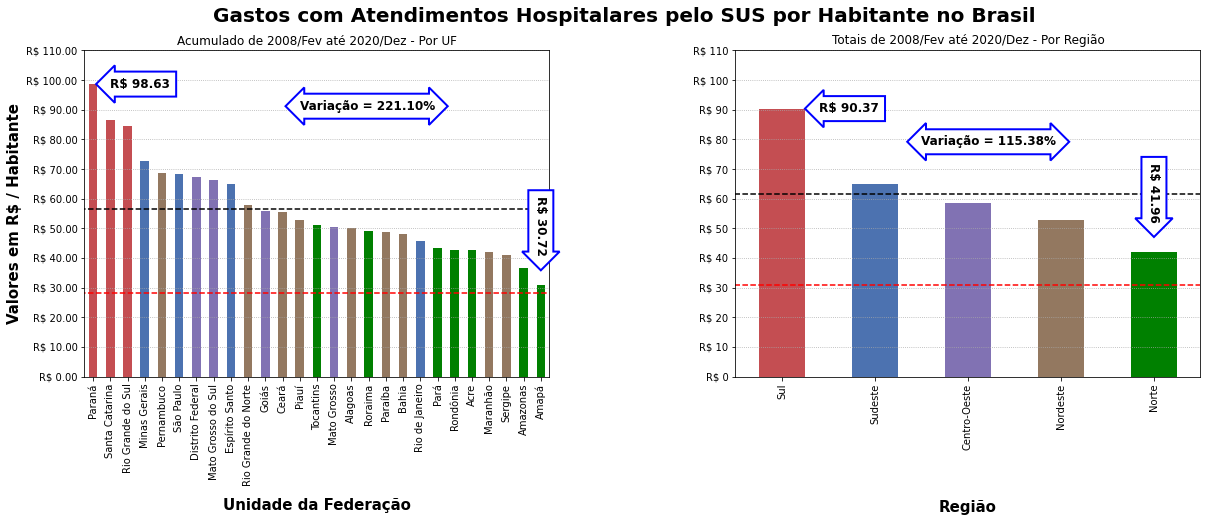

In [19]:
fig2, (ax3,ax4) = plt.subplots(1,2,figsize=(20,6))
fig2.suptitle('Gastos com Atendimentos Hospitalares pelo SUS por Habitante no Brasil',
             fontsize=20, fontweight='bold')

maior_estado_hab=df_atends_habit['Total'].idxmax()
val_maior_estado_hab=df_atends_habit.loc[maior_estado_hab]['Total']
str_maior_estado_hab='R$ '+'{:,.2f}'.format(val_maior_estado_hab)
menor_estado=df_atends_habit['Total'].idxmin()
val_menor_estado_hab=df_atends_habit.loc[menor_estado]['Total']
str_menor_estado='R$ '+'{:,.2f}'.format(val_menor_estado_hab)

var_maior_menor=(val_maior_estado_hab/val_menor_estado_hab)-1
str_var='Variação = '+'{:,.2%}'.format(var_maior_menor)

maior_rg_hab=df_atends_habit_rg['Total'].sort_values(ascending=False).idxmax()
valor_maior_rg_hab=df_atends_habit_rg['Total'][maior_rg_hab]
str_maior_rg_hab='R$ '+'{:,.2f}'.format(valor_maior_rg_hab)
menor_rg_hab=df_atends_habit_rg['Total'].sort_values(ascending=False).idxmin()
valor_menor_rg_hab=df_atends_habit_rg['Total'][menor_rg_hab]
str_menor_rg_hab='R$ '+'{:,.2f}'.format(valor_menor_rg_hab)

var_max_min_rg_hab=(valor_maior_rg_hab/valor_menor_rg_hab)-1
str_var_rg_hab='Variação = '+'{:,.2%}'.format(var_max_min_rg_hab)

#Estabelecer cores das barras das UFs
cores_esq=[]
for i in df_atends_habit['Total'].sort_values(ascending=False).index:
    if df_atends_habit.loc[i,'Região']=='Sul':
        cores_esq=cores_esq+['#C44E52']
    elif df_atends_habit.loc[i,'Região']=='Sudeste':
        cores_esq=cores_esq+['#4C72B0']
    elif df_atends_habit.loc[i,'Região']=='Nordeste':
        cores_esq=cores_esq+['#937860']
    elif df_atends_habit.loc[i,'Região']=='Centro-Oeste':
        cores_esq=cores_esq+['#8172B3']
    elif df_atends_habit.loc[i,'Região']=='Norte':
        cores_esq=cores_esq+['green']
    else:
        cores_esq=cores_esq+['black']

cores_dir=[]
for i in df_atends_habit_rg['Total'].sort_values(ascending=False).index:
    if i=='Sul':
        cores_dir=cores_dir+['#C44E52']
    elif i=='Sudeste':
        cores_dir=cores_dir+['#4C72B0']
    elif i=='Nordeste':
        cores_dir=cores_dir+['#937860']
    elif i=='Centro-Oeste':
        cores_dir=cores_dir+['#8172B3']
    elif i=='Norte':
        cores_dir=cores_dir+['green']
    else:
        cores_dir=cores_dir+['black']

#Gráfico Esquerda
ax3=df_atends_habit['Total'].sort_values(
    ascending=False).plot(kind='bar', ax=ax3,
                          color=cores_esq)
ax3.set_title('Acumulado de 2008/Fev até 2020/Dez - Por UF')
ax3.grid(color='darkgrey',linestyle=':',axis='y')
ax3.yaxis.set_major_formatter(
    ticker.StrMethodFormatter('R$ {x:,.2f}'))
ax3.set_xlabel('Unidade da Federação', labelpad=12,
               fontweight='bold', fontsize=15)
ax3.set_ylabel('Valores em R$ / Habitante',fontweight='bold', fontsize=15)
ax3.hlines(y=df_atends_habit['Total'].sort_values(ascending=False).mean(),
           xmin=-10,xmax=100,color='black', linestyle='--')
ax3.hlines(y=df_atends_habit['Total'].sort_values(ascending=False).mean()/2,
           xmin=-10,xmax=100,color='red', linestyle='--')
ax3.set_yticks(np.arange(0, 120, 10))

t3_max = ax3.text(
    1, val_maior_estado_hab, str_maior_estado_hab,
    fontweight='bold', fontsize=12,
    ha='left', va='center',
    bbox=dict(boxstyle='larrow,pad=0.5',
              facecolor='white',ec='blue', lw=2))
t3_min = ax3.text(
    26, val_menor_estado_hab+20, str_menor_estado,
    fontweight='bold', fontsize=12,
    rotation=270, ha='center', va='center',
    bbox=dict(boxstyle='rarrow,pad=0.5',
              facecolor='white',ec='blue', lw=2))
t3_var=ax3.text(
    12,90,str_var,
    fontweight='bold', fontsize=12,
    bbox=dict(
        boxstyle='darrow,pad=0.5',
        facecolor='white',ec='blue',lw=2))

#Gráfico Direita
ax4=df_atends_habit_rg['Total'].sort_values(ascending=False).plot(
    kind='bar', ax=ax4,color=cores_dir)
ax4.set_title('Totais de 2008/Fev até 2020/Dez - Por Região')
ax4.grid(color='darkgrey',linestyle=':',axis='y')
ax4.yaxis.set_major_formatter(
    ticker.StrMethodFormatter('R$ {x:,.0f}'))
ax4.set_xlabel('Região', labelpad=50,
               fontweight='bold', fontsize=15)
ax4.hlines(y=df_atends_habit_rg['Total'].mean(),
           xmin=-10,xmax=100,color='black', linestyle='--')
ax4.hlines(y=df_atends_habit_rg['Total'].mean()/2,
           xmin=-10,xmax=100,color='red', linestyle='--')
ax4.set_yticks(np.arange(0, 120, 10))

t4_max = ax4.text(
    0.4, valor_maior_rg_hab, str_maior_rg_hab,
    fontweight='bold', fontsize=12,
    ha='left', va='center',
    bbox=dict(boxstyle='larrow,pad=0.5',
              facecolor='white',ec='blue', lw=2))
t4_min = ax4.text(
    4, valor_menor_rg_hab+20, str_menor_rg_hab,
    fontweight='bold', fontsize=12,
    rotation=270, ha='center', va='center',
    bbox=dict(boxstyle='rarrow,pad=0.5',
              facecolor='white',ec='blue', lw=2))
t4_var=ax4.text(
    1.5,78,str_var_rg_hab,
    fontweight='bold', fontsize=12,
    bbox=dict(
        boxstyle='darrow,pad=0.5',
        facecolor='white',ec='blue',lw=2))

plt.subplots_adjust(wspace=0.4) 
plt.show()

Sob essa ótica tivemos uma boa alteração no nosso *ranking* de gastos. Os estados do Sul assumiram a dianteira mas a disparidade não é tão grande a ponto de alterar a escala, como antes.

Chama nossa atenção:
* os 3 estados do Sul e, por consequência a região Sul como um todo, apresentam os maiores gastos por habitante;
* a diferença entre o maior (Paraná) e o menor (Amapá) é de 221%, bem inferior aos quase 13.000% que tínhamos antes;
* temos 10 UFs que apresentam gastos acima da média (linha tracejada preta), enquanto as 16 UFs restantes apresentam gastos entre 50% e 100% da média. Nenhuma UF ficou abaixo de 50% da média (linha tracejada vermelha);
* a região Nordeste, que tinha se apresentado na 2º posição avaliando o valor bruto, passou para a 4ª posição na avaliação *per capita*;
* as regiões Sudeste e Centro-Oeste, que apresentavam mais de 500% de variação entre si passaram a ter pouco mais de 10% de diferença.

Ainda assim, as diferenças entre os extremos são significativas e requerem maior investigação.

## Adicionando Dados de Internações
---

Para investigar a relação dos valores gastos com a quantidade de internações de cada período, vamos recorrer novamente ao DataSUS.

De lá vamos importar os dados mensais de internações por UF, por mês.

In [20]:
url_intern = 'https://github.com/gcochlar/Bootcamp_DataScience/raw/main/dados/DataSUS-Internacoes.csv'

intern = pd.read_csv(url_intern, sep=';', 
                   encoding='ISO-8859-1',decimal=',',thousands='.',
                   skiprows=3, skipfooter=12, engine='python')

intern[['Código UF','UF']]=pd.DataFrame(
    intern['Unidade da Federação'].str.split(' ',1).tolist())

intern=intern.T.drop(['Unidade da Federação','Código UF','Total','2008/Jan','2021/Jan','2021/Fev','2021/Mar']).T
intern=intern.set_index('UF')

intern=intern.replace('-', np.nan)
intern=intern.astype(float)

print(color.BOLD+color.UNDERLINE+color.DARKCYAN+'\nDados Nulos:'+color.END,intern.isnull().sum().sum())


Dados Nulos: 1


O resumo da importação mostra a existência de um dado nulo na importação. Esse dado nulo precisa ser identificado e tratado.

In [21]:
linhas_nan = intern[intern.isnull().any(1)]
print(linhas_nan.index)

cols_nan=intern.loc[:, intern.isnull().any()].columns
print(cols_nan)

Index(['Acre'], dtype='object', name='UF')
Index(['2009/Set'], dtype='object')


O teste acima identifica que o dado nulo está na linha **Acre** e na coluna **2009/Set**. Vamos avaliar os dados no período de 6 meses antes e depois do mês em referência, para verificar se não temos algum tipo de lançamento em dobro em um mês próximo, que justificaria um erro de lançamento.

In [22]:
intern.loc['Acre','2009/Mar':'2010/Mar']

2009/Mar   4,162.00
2009/Abr   4,894.00
2009/Mai   4,647.00
2009/Jun   4,291.00
2009/Jul   4,582.00
2009/Ago   4,379.00
2009/Set        nan
2009/Out   4,689.00
2009/Nov   3,959.00
2009/Dez   4,327.00
2010/Jan   4,412.00
2010/Fev   3,665.00
2010/Mar   4,203.00
Name: Acre, dtype: float64

Analisando os dados da tabela acima não é possível identificar nenhuma variação significativa que justifique a inexistência de internações nesse mês. Para não criar uma distorção na série de dados, vamos usar a interpolação para preencher o dado faltante.

In [23]:
intern.interpolate(axis=1, inplace=True)
intern.loc['Acre','2009/Mar':'2010/Mar']

2009/Mar   4,162.00
2009/Abr   4,894.00
2009/Mai   4,647.00
2009/Jun   4,291.00
2009/Jul   4,582.00
2009/Ago   4,379.00
2009/Set   4,534.00
2009/Out   4,689.00
2009/Nov   3,959.00
2009/Dez   4,327.00
2010/Jan   4,412.00
2010/Fev   3,665.00
2010/Mar   4,203.00
Name: Acre, dtype: float64

Com a base completa, vamos sumarizar por ano, calcular os valores por internação e plotar os gráficos correspondentes para ver o que conseguimos descobrir.

In [24]:
intern_anual=pd.DataFrame()

for i in range(2008,2021):
    if i==2008:
        i_inicial=f'{i}/Fev'
    else:
        i_inicial=f'{i}/Jan'
    i_final=f'{i}/Dez'
    intern_anual[str(i)]=intern.loc[:,i_inicial:i_final].sum(axis=1)

intern_anual['Total']=intern_anual.sum(axis=1)
intern_anual['Região']=df_atends['Região']
intern_anual.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total,Região
UF,,,,,,,,,,,,,,,
Rondônia,"67,679.00","95,208.00","100,265.00","98,808.00","94,517.00","107,322.00","116,066.00","111,558.00","111,299.00","113,432.00","119,878.00","122,900.00","103,107.00","1,362,039.00",Norte
Acre,"44,000.00","53,134.00","49,687.00","52,218.00","51,027.00","51,513.00","52,733.00","49,199.00","48,391.00","44,002.00","44,611.00","44,563.00","43,071.00","628,149.00",Norte
Amazonas,"154,466.00","153,793.00","160,880.00","167,585.00","164,109.00","167,015.00","152,568.00","168,896.00","166,305.00","175,069.00","184,790.00","196,792.00","179,524.00","2,191,792.00",Norte
Roraima,"23,228.00","30,045.00","31,199.00","27,269.00","32,082.00","33,884.00","30,329.00","34,834.00","40,269.00","43,658.00","43,745.00","44,672.00","39,561.00","454,775.00",Norte
Pará,"470,710.00","526,745.00","528,520.00","511,097.00","487,950.00","498,765.00","490,632.00","471,753.00","463,631.00","480,382.00","493,920.00","484,950.00","433,008.00","6,342,063.00",Norte


In [25]:
df_atends_intern=df_atends_anual.iloc[:,:-1]/intern_anual.iloc[:,:-1]
df_atends_intern['Região']=df_atends['Região']

df_atends_intern_rg=df_atends_anual.groupby('Região').sum()/intern_anual.groupby('Região').sum()

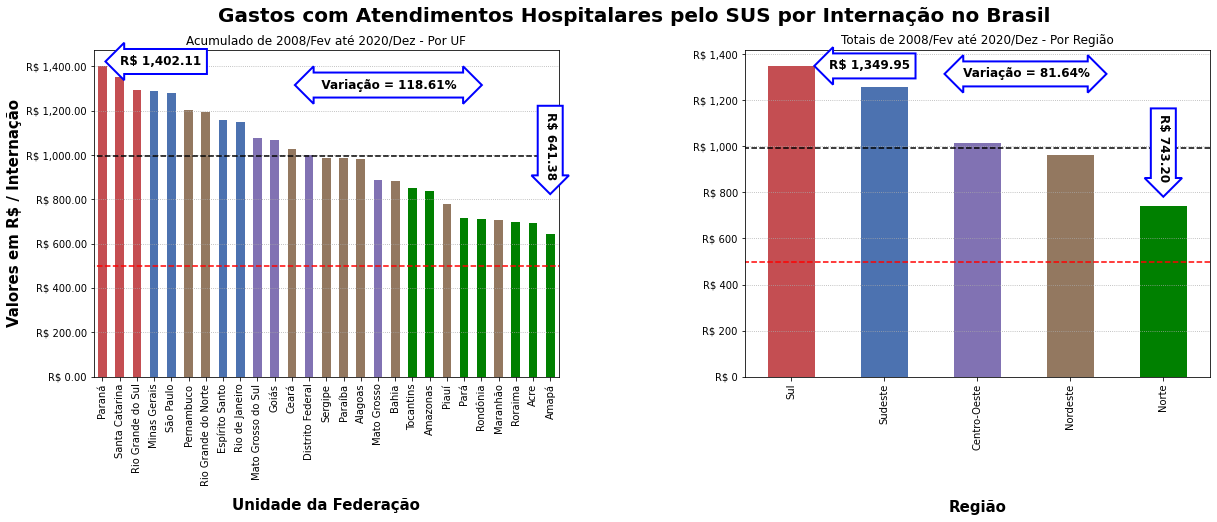

In [26]:
fig3, (ax5,ax6) = plt.subplots(1,2,figsize=(20,6))
fig3.suptitle('Gastos com Atendimentos Hospitalares pelo SUS por Internação no Brasil',
             fontsize=20, fontweight='bold')

maior_estado_intern=df_atends_intern['Total'].idxmax()
val_maior_estado_intern=df_atends_intern.loc[maior_estado_intern]['Total']
str_maior_estado_int='R$ '+'{:,.2f}'.format(val_maior_estado_intern)
menor_estado_intern=df_atends_intern['Total'].idxmin()
val_menor_estado_intern=df_atends_intern.loc[menor_estado_intern]['Total']
str_menor_estado_int='R$ '+'{:,.2f}'.format(val_menor_estado_intern)

var_maior_menor_int=(val_maior_estado_intern/val_menor_estado_intern)-1
str_var_int='   Variação = '+'{:,.2%}'.format(var_maior_menor_int)+'   '

maior_rg_int=df_atends_intern_rg['Total'].sort_values(ascending=False).idxmax()
valor_maior_rg_int=df_atends_intern_rg['Total'][maior_rg_int]
str_maior_rg_int='R$ '+'{:,.2f}'.format(valor_maior_rg_int)
menor_rg_int=df_atends_intern_rg['Total'].sort_values(ascending=False).idxmin()
valor_menor_rg_int=df_atends_intern_rg['Total'][menor_rg_int]
str_menor_rg_int='R$ '+'{:,.2f}'.format(valor_menor_rg_int)

var_max_min_rg_int=(valor_maior_rg_int/valor_menor_rg_int)-1
str_var_rg_int=' Variação = '+'{:,.2%}'.format(var_max_min_rg_int)+' '

#Estabelecer cores das barras das UFs
cores_esq=[]
for i in df_atends_intern['Total'].sort_values(ascending=False).index:
    if df_atends_intern.loc[i,'Região']=='Sul':
        cores_esq=cores_esq+['#C44E52']
    elif df_atends_intern.loc[i,'Região']=='Sudeste':
        cores_esq=cores_esq+['#4C72B0']
    elif df_atends_intern.loc[i,'Região']=='Nordeste':
        cores_esq=cores_esq+['#937860']
    elif df_atends_intern.loc[i,'Região']=='Centro-Oeste':
        cores_esq=cores_esq+['#8172B3']
    elif df_atends_intern.loc[i,'Região']=='Norte':
        cores_esq=cores_esq+['green']
    else:
        cores_esq=cores_esq+['black']

cores_dir=[]
for i in df_atends_intern_rg['Total'].sort_values(ascending=False).index:
    if i=='Sul':
        cores_dir=cores_dir+['#C44E52']
    elif i=='Sudeste':
        cores_dir=cores_dir+['#4C72B0']
    elif i=='Nordeste':
        cores_dir=cores_dir+['#937860']
    elif i=='Centro-Oeste':
        cores_dir=cores_dir+['#8172B3']
    elif i=='Norte':
        cores_dir=cores_dir+['green']
    else:
        cores_dir=cores_dir+['black']

#Gráfico Esquerda
ax3=df_atends_intern['Total'].sort_values(
    ascending=False).plot(kind='bar', ax=ax5,
                          color=cores_esq)
ax5.set_title('Acumulado de 2008/Fev até 2020/Dez - Por UF')
ax5.grid(color='darkgrey',linestyle=':',axis='y')
ax5.yaxis.set_major_formatter(
    ticker.StrMethodFormatter('R$ {x:,.2f}'))
ax5.set_xlabel('Unidade da Federação', labelpad=12,
               fontweight='bold', fontsize=15)
ax5.set_ylabel('Valores em R$ / Internação',fontweight='bold', fontsize=15)
ax5.hlines(y=df_atends_intern['Total'].sort_values(ascending=False).mean(),
           xmin=-10,xmax=100,color='black', linestyle='--')
ax5.hlines(y=df_atends_intern['Total'].sort_values(ascending=False).mean()/2,
           xmin=-10,xmax=100,color='red', linestyle='--')

t5_max = ax5.text(
    1, val_maior_estado_intern+20, str_maior_estado_int,
    fontweight='bold', fontsize=12,
    ha='left', va='center',
    bbox=dict(boxstyle='larrow,pad=0.5',
              facecolor='white',ec='blue', lw=2))
t5_min = ax5.text(
    26, val_menor_estado_intern+400, str_menor_estado_int,
    fontweight='bold', fontsize=12,
    rotation=270, ha='center', va='center',
    bbox=dict(boxstyle='rarrow,pad=0.5',
              facecolor='white',ec='blue', lw=2))
t5_var=ax5.text(
    12,1300,str_var_int,
    fontweight='bold', fontsize=12,
    bbox=dict(
        boxstyle='darrow,pad=0.5',
        facecolor='white',ec='blue',lw=2))

#Gráfico Direita
ax6=df_atends_intern_rg['Total'].sort_values(ascending=False).plot(
    kind='bar', ax=ax6,color=cores_dir)
ax6.set_title('Totais de 2008/Fev até 2020/Dez - Por Região')
ax6.grid(color='darkgrey',linestyle=':',axis='y')
ax6.yaxis.set_major_formatter(
    ticker.StrMethodFormatter('R$ {x:,.0f}'))
ax6.set_xlabel('Região', labelpad=50,
               fontweight='bold', fontsize=15)
ax6.hlines(y=df_atends_intern['Total'].mean(),
           xmin=-10,xmax=100,color='black', linestyle='--')
ax6.hlines(y=df_atends_intern['Total'].mean()/2,
           xmin=-10,xmax=100,color='red', linestyle='--')

t6_max = ax6.text(
    0.4, valor_maior_rg_int, str_maior_rg_int,
    fontweight='bold', fontsize=12,
    ha='left', va='center',
    bbox=dict(boxstyle='larrow,pad=0.5',
              facecolor='white',ec='blue', lw=2))
t6_min = ax6.text(
    4, valor_menor_rg_int+100, str_menor_rg_int,
    fontweight='bold', fontsize=12,
    rotation=270, ha='center', va='bottom',
    bbox=dict(boxstyle='rarrow,pad=0.5',
              facecolor='white',ec='blue', lw=2))
t6_var=ax6.text(
    1.8,1300,str_var_rg_int,
    fontweight='bold', fontsize=12,
    bbox=dict(
        boxstyle='darrow,pad=0.5',
        facecolor='white',ec='blue',lw=2))

plt.subplots_adjust(wspace=0.4) 
plt.show()

Analisando sob esse prisma temos os dados ainda mais equilibrados, com uma variação de 118,61% entre a maior e a menor UF, com metade das UFs acima da média e o restante entre a média e seus 50%.

Ao examinar as regiões, pela primeira vez temos uma variação inferior a 100% entre o Sul e o Norte, os valores extremos.


## Formulação de Hipóteses

Com a evolução das informações até o presente momento, temos algumas hipóteses a serem avaliadas. São elas:
* as internações nas regiões Sul e Sudeste são de maior duração do que no restante do país, o que justificaria seu maior custo
* as taxas de internações por 1 mil habitantes são maiores nas regiões Sul e Sudeste

### **Hipótese 1**
---
>As internações nas regiões Sul e Sudeste são de maior duração do que no restante do país

---

Para avaliar essa hipótese vamos importar os dados de dias de permanência, também obtidos através do DataSUS. Em função da compatibilidade com os demais dados, iremos manter somente os meses de 2008/Fev até 2020/Dez.

In [27]:
url_dias_perm = 'https://github.com/gcochlar/Bootcamp_DataScience/raw/main/dados/DataSUS-dias_perman.csv'

dias_perman = pd.read_csv(url_dias_perm, sep=';', 
                   encoding='ISO-8859-1',decimal=',',thousands='.',
                   skiprows=3, skipfooter=12, engine='python')

dias_perman[['Código UF','UF']]=pd.DataFrame(
    dias_perman['Unidade da Federação'].str.split(' ',1).tolist())

dias_perman=dias_perman.T.drop(['Unidade da Federação','Código UF','Total','2008/Jan','2021/Jan','2021/Fev','2021/Mar']).T
dias_perman=dias_perman.set_index('UF')

dias_perman=dias_perman.replace('-', np.nan)
dias_perman=dias_perman.astype(float)

print(color.BOLD+color.UNDERLINE+color.DARKCYAN+'\nDados Nulos:'+color.END,dias_perman.isnull().sum().sum())


Dados Nulos: 1


In [28]:
linhas_nan = dias_perman[dias_perman.isnull().any(1)]
print(linhas_nan.index)

cols_nan=dias_perman.loc[:, dias_perman.isnull().any()].columns
print(cols_nan)

Index(['Acre'], dtype='object', name='UF')
Index(['2009/Set'], dtype='object')


In [29]:
dias_perman.loc['Acre','2009/Mar':'2010/Mar']

2009/Mar   17,345.00
2009/Abr   21,739.00
2009/Mai   21,115.00
2009/Jun   19,004.00
2009/Jul   20,936.00
2009/Ago   18,263.00
2009/Set         nan
2009/Out   20,416.00
2009/Nov   15,657.00
2009/Dez   21,477.00
2010/Jan   20,368.00
2010/Fev   15,411.00
2010/Mar   17,370.00
Name: Acre, dtype: float64

Mais uma vez a importação aponta a existência de 1 dado nulo no *dataset* e novamente o problema é o **Acre** no mês de **2009/Set**. Tudo indica que houve algum erro na importação dos dados desse estado nesse mês e que isso não foi tratado, deixando a base de dados do DataSUS com esse *gap*.

Vamos prosseguir da mesma forma que antes, usando a interpolação para preencher o dado faltante.

In [30]:
dias_perman.interpolate(axis=1, inplace=True)
dias_perman.loc['Acre','2009/Mar':'2010/Mar']

2009/Mar   17,345.00
2009/Abr   21,739.00
2009/Mai   21,115.00
2009/Jun   19,004.00
2009/Jul   20,936.00
2009/Ago   18,263.00
2009/Set   19,339.50
2009/Out   20,416.00
2009/Nov   15,657.00
2009/Dez   21,477.00
2010/Jan   20,368.00
2010/Fev   15,411.00
2010/Mar   17,370.00
Name: Acre, dtype: float64

Com a base preenchida, vamos totalizar os dados em cada ano e dividir pelas internações para descobrir o tempo médio de permanência em cada uma das UFs e regiões, para poder compará-las.

In [31]:
dias_perman_anual=pd.DataFrame()

for i in range(2008,2021):
    if i==2008:
        i_inicial=f'{i}/Fev'
    else:
        i_inicial=f'{i}/Jan'
    i_final=f'{i}/Dez'
    dias_perman_anual[str(i)]=dias_perman.loc[:,i_inicial:i_final].sum(axis=1)

dias_perman_anual['Total']=dias_perman_anual.sum(axis=1)
dias_perman_anual['Região']=df_atends['Região']
dias_perman_anual.sample(5)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total,Região
UF,,,,,,,,,,,,,,,
Goiás,"1,673,346.00","1,861,264.00","1,903,050.00","1,842,098.00","1,775,624.00","1,794,280.00","1,723,847.00","1,761,802.00","1,628,928.00","1,567,941.00","1,556,739.00","1,657,360.00","1,545,488.00","22,291,767.00",Centro-Oeste
Rio Grande do Sul,"3,909,309.00","4,304,589.00","4,388,520.00","4,288,891.00","4,401,057.00","4,608,040.00","4,708,628.00","4,727,214.00","4,606,296.00","4,538,154.00","4,547,251.00","4,641,786.00","4,080,949.00","57,750,684.00",Sul
Alagoas,"875,379.00","980,445.00","962,302.00","979,196.00","955,379.00","972,881.00","918,109.00","922,821.00","894,327.00","891,153.00","862,813.00","904,041.00","807,238.00","11,926,084.00",Nordeste
Pará,"1,764,075.00","1,950,604.00","1,948,547.00","1,903,622.00","1,847,557.00","1,879,711.00","1,903,428.00","1,867,997.00","1,855,520.00","1,975,983.00","2,020,860.00","1,984,623.00","1,821,275.00","24,723,802.00",Norte
Distrito Federal,"1,133,844.00","1,186,407.00","1,230,196.00","1,247,485.00","1,275,631.00","1,209,283.00","1,151,765.00","1,148,602.00","1,186,375.00","1,179,330.00","1,308,823.00","1,324,112.00","1,164,460.00","15,746,313.00",Centro-Oeste


In [32]:
perman_intern=dias_perman_anual.iloc[:,:-1]/intern_anual.iloc[:,:-1]
perman_intern['Região']=df_atends['Região']

perman_intern_rg=dias_perman_anual.groupby('Região').sum()/intern_anual.groupby('Região').sum()

Agora vamos plotar os dados obtidos e verificar a consistência da hipótese formulada.

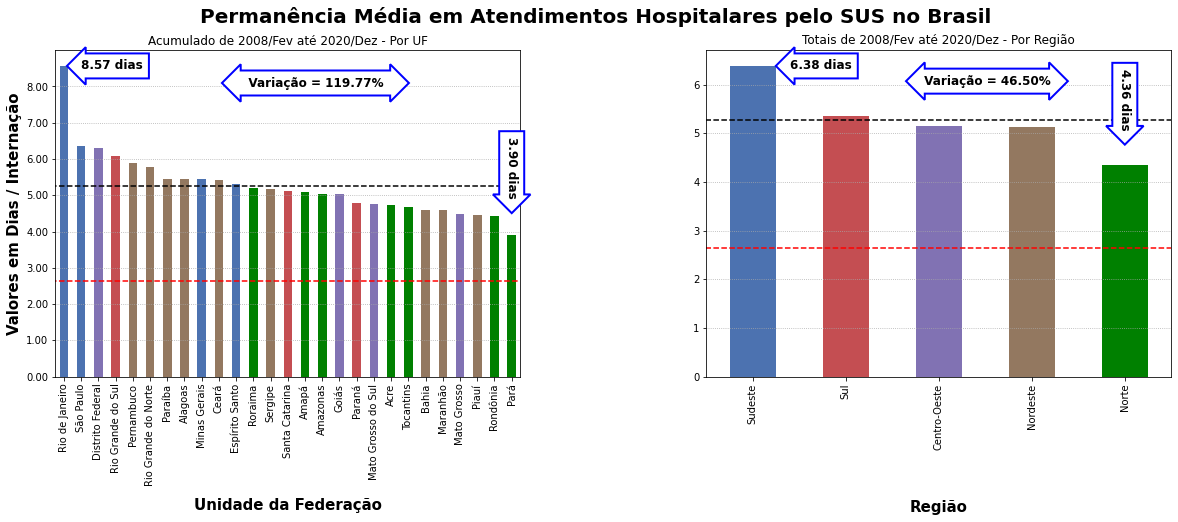

In [33]:
fig4, (ax7,ax8) = plt.subplots(1,2,figsize=(20,6))
fig4.suptitle('Permanência Média em Atendimentos Hospitalares pelo SUS no Brasil',
             fontsize=20, fontweight='bold')

maior_estado_perm=perman_intern['Total'].idxmax()
val_maior_estado_perm=perman_intern.loc[maior_estado_perm]['Total']
str_maior_estado_perm='{:,.2f}'.format(val_maior_estado_perm)+' dias'
menor_estado_perm=perman_intern['Total'].idxmin()
val_menor_estado_perm=perman_intern.loc[menor_estado_perm]['Total']
str_menor_estado_perm='{:,.2f}'.format(val_menor_estado_perm)+' dias'

var_maior_menor_perm=(val_maior_estado_perm/val_menor_estado_perm)-1
str_var_perm='   Variação = '+'{:,.2%}'.format(var_maior_menor_perm)+'   '

maior_rg_perm=perman_intern_rg['Total'].sort_values(ascending=False).idxmax()
valor_maior_rg_perm=perman_intern_rg['Total'][maior_rg_perm]
str_maior_rg_perm='{:,.2f}'.format(valor_maior_rg_perm)+' dias'
menor_rg_perm=perman_intern_rg['Total'].sort_values(ascending=False).idxmin()
valor_menor_rg_perm=perman_intern_rg['Total'][menor_rg_perm]
str_menor_rg_perm='{:,.2f}'.format(valor_menor_rg_perm)+' dias'

var_max_min_rg_perm=(valor_maior_rg_perm/valor_menor_rg_perm)-1
str_var_rg_perm=' Variação = '+'{:,.2%}'.format(var_max_min_rg_perm)+' '

#Estabelecer cores das barras das UFs
cores_esq=[]
for i in perman_intern['Total'].sort_values(ascending=False).index:
    if perman_intern.loc[i,'Região']=='Sul':
        cores_esq=cores_esq+['#C44E52']
    elif perman_intern.loc[i,'Região']=='Sudeste':
        cores_esq=cores_esq+['#4C72B0']
    elif perman_intern.loc[i,'Região']=='Nordeste':
        cores_esq=cores_esq+['#937860']
    elif perman_intern.loc[i,'Região']=='Centro-Oeste':
        cores_esq=cores_esq+['#8172B3']
    elif perman_intern.loc[i,'Região']=='Norte':
        cores_esq=cores_esq+['green']
    else:
        cores_esq=cores_esq+['black']

cores_dir=[]
for i in perman_intern_rg['Total'].sort_values(ascending=False).index:
    if i=='Sul':
        cores_dir=cores_dir+['#C44E52']
    elif i=='Sudeste':
        cores_dir=cores_dir+['#4C72B0']
    elif i=='Nordeste':
        cores_dir=cores_dir+['#937860']
    elif i=='Centro-Oeste':
        cores_dir=cores_dir+['#8172B3']
    elif i=='Norte':
        cores_dir=cores_dir+['green']
    else:
        cores_dir=cores_dir+['black']

#Gráfico Esquerda
ax7=perman_intern['Total'].sort_values(
    ascending=False).plot(kind='bar', ax=ax7,
                          color=cores_esq)
ax7.set_title('Acumulado de 2008/Fev até 2020/Dez - Por UF')
ax7.grid(color='darkgrey',linestyle=':',axis='y')
ax7.yaxis.set_major_formatter(
    ticker.StrMethodFormatter('{x:,.2f}'))
ax7.set_xlabel('Unidade da Federação', labelpad=12,
               fontweight='bold', fontsize=15)
ax7.set_ylabel('Valores em Dias / Internação',fontweight='bold', fontsize=15)
ax7.hlines(y=perman_intern['Total'].sort_values(ascending=False).mean(),
           xmin=-10,xmax=100,color='black', linestyle='--')
ax7.hlines(y=perman_intern['Total'].sort_values(ascending=False).mean()/2,
           xmin=-10,xmax=100,color='red', linestyle='--')

t7_max = ax7.text(
    1, val_maior_estado_perm, str_maior_estado_perm,
    fontweight='bold', fontsize=12,
    ha='left', va='center',
    bbox=dict(boxstyle='larrow,pad=0.5',
              facecolor='white',ec='blue', lw=2))
t7_min = ax7.text(
    26, val_menor_estado_perm+1, str_menor_estado_perm,
    fontweight='bold', fontsize=12,
    rotation=270, ha='center', va='bottom',
    bbox=dict(boxstyle='rarrow,pad=0.5',
              facecolor='white',ec='blue', lw=2))
t7_var=ax7.text(
    10,8,str_var_perm,
    fontweight='bold', fontsize=12,
    bbox=dict(
        boxstyle='darrow,pad=0.5',
        facecolor='white',ec='blue',lw=2))

#Gráfico Direita
ax8=perman_intern_rg['Total'].sort_values(ascending=False).plot(
    kind='bar', ax=ax8,color=cores_dir)
ax8.set_title('Totais de 2008/Fev até 2020/Dez - Por Região')
ax8.grid(color='darkgrey',linestyle=':',axis='y')
ax8.yaxis.set_major_formatter(
    ticker.StrMethodFormatter('{x:,.0f}'))
ax8.set_xlabel('Região', labelpad=50,
               fontweight='bold', fontsize=15)
ax8.hlines(y=perman_intern['Total'].mean(),
           xmin=-10,xmax=100,color='black', linestyle='--')
ax8.hlines(y=perman_intern['Total'].mean()/2,
           xmin=-10,xmax=100,color='red', linestyle='--')

t8_max = ax8.text(
    0.4, valor_maior_rg_perm, str_maior_rg_perm,
    fontweight='bold', fontsize=12,
    ha='left', va='center',
    bbox=dict(boxstyle='larrow,pad=0.5',
              facecolor='white',ec='blue', lw=2))
t8_min = ax8.text(
    4, valor_menor_rg_perm+.7, str_menor_rg_perm,
    fontweight='bold', fontsize=12,
    rotation=270, ha='center', va='bottom',
    bbox=dict(boxstyle='rarrow,pad=0.5',
              facecolor='white',ec='blue', lw=2))
t8_var=ax8.text(
    1.8,6,str_var_rg_perm,
    fontweight='bold', fontsize=12,
    bbox=dict(
        boxstyle='darrow,pad=0.5',
        facecolor='white',ec='blue',lw=2))

plt.subplots_adjust(wspace=0.4) 
plt.show()

Com essa avaliação a **hipótese não se comprovou**.

Apesar de termos uma distorção importante a ser investigada no Rio de Janeiro, a maior parte das UFs está situada no intervalo entre 4 e 6 dias de internação média. Isso justificaria uma variação de até 50% nos valores gastos por internação, mas a variação que obtivemos é mais do que o dobro disso (118,81%).

A avaliação agrupada por regiões apresenta uma diferença de 46,5% entre o Norte e o Sudeste, contra os 81,64% obtidos quando comparamos o valor gasto por internação.

Dessa forma, considero que o tempo de internação não justifica os maiores gastos apresentados pelos estados das regiões Sul e Sudeste.

### **Hipótese 2**
---

>As taxas de internações por 1 mil habitantes são maiores nas regiões Sul e Sudeste

---

Para verificar essa hipótese não precisamos trazer novos dados para o estudo, já temos todo o necessário.

Vamos calcular as taxas, então.

In [34]:
intern_1k=intern_anual.iloc[:,:-1]/proj_populacao.iloc[:,:-1]*1000
intern_1k['Região']=df_atends['Região']

intern_1k_rg=intern_anual.groupby('Região').sum()/proj_populacao.groupby('Região').sum()*1000

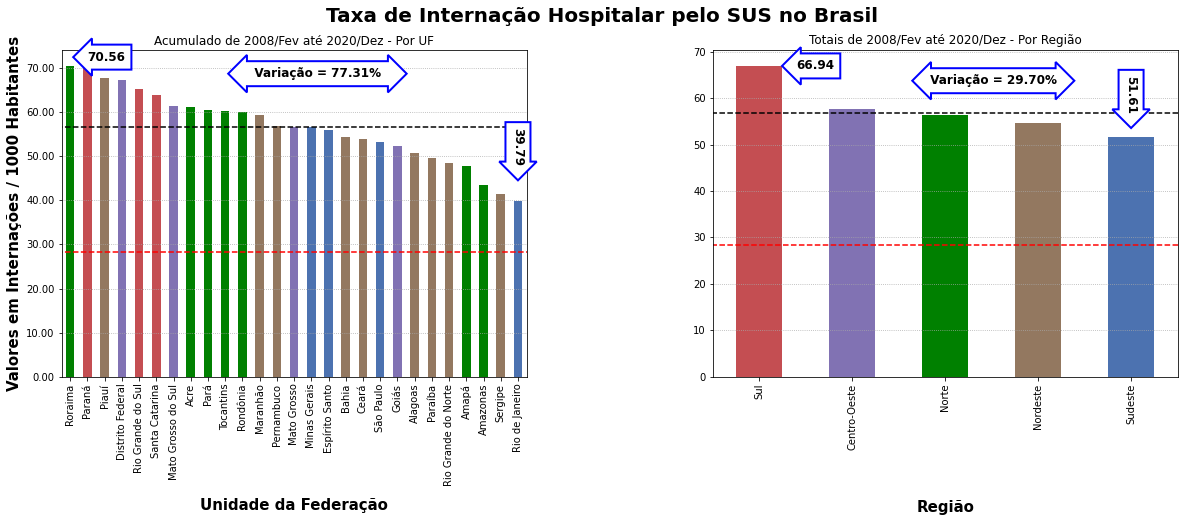

In [35]:
fig5, (ax9,ax10) = plt.subplots(1,2,figsize=(20,6))
fig5.suptitle('Taxa de Internação Hospitalar pelo SUS no Brasil',
             fontsize=20, fontweight='bold')

maior_estado_tx=intern_1k['Total'].idxmax()
val_maior_estado_tx=intern_1k.loc[maior_estado_tx]['Total']
str_maior_estado_tx='{:,.2f}'.format(val_maior_estado_tx)
menor_estado_tx=intern_1k['Total'].idxmin()
val_menor_estado_tx=intern_1k.loc[menor_estado_tx]['Total']
str_menor_estado_tx='{:,.2f}'.format(val_menor_estado_tx)

var_maior_menor_tx=(val_maior_estado_tx/val_menor_estado_tx)-1
str_var_tx='   Variação = '+'{:,.2%}'.format(var_maior_menor_tx)+'   '

maior_rg_tx=intern_1k_rg['Total'].sort_values(ascending=False).idxmax()
valor_maior_rg_tx=intern_1k_rg['Total'][maior_rg_tx]
str_maior_rg_tx='{:,.2f}'.format(valor_maior_rg_tx)
menor_rg_tx=intern_1k_rg['Total'].sort_values(ascending=False).idxmin()
valor_menor_rg_tx=intern_1k_rg['Total'][menor_rg_tx]
str_menor_rg_tx='{:,.2f}'.format(valor_menor_rg_tx)

var_max_min_rg_tx=(valor_maior_rg_tx/valor_menor_rg_tx)-1
str_var_rg_tx=' Variação = '+'{:,.2%}'.format(var_max_min_rg_tx)+' '

#Estabelecer cores das barras das UFs
cores_esq=[]
for i in intern_1k['Total'].sort_values(ascending=False).index:
    if intern_1k.loc[i,'Região']=='Sul':
        cores_esq=cores_esq+['#C44E52']
    elif intern_1k.loc[i,'Região']=='Sudeste':
        cores_esq=cores_esq+['#4C72B0']
    elif intern_1k.loc[i,'Região']=='Nordeste':
        cores_esq=cores_esq+['#937860']
    elif intern_1k.loc[i,'Região']=='Centro-Oeste':
        cores_esq=cores_esq+['#8172B3']
    elif intern_1k.loc[i,'Região']=='Norte':
        cores_esq=cores_esq+['green']
    else:
        cores_esq=cores_esq+['black']

cores_dir=[]
for i in intern_1k_rg['Total'].sort_values(ascending=False).index:
    if i=='Sul':
        cores_dir=cores_dir+['#C44E52']
    elif i=='Sudeste':
        cores_dir=cores_dir+['#4C72B0']
    elif i=='Nordeste':
        cores_dir=cores_dir+['#937860']
    elif i=='Centro-Oeste':
        cores_dir=cores_dir+['#8172B3']
    elif i=='Norte':
        cores_dir=cores_dir+['green']
    else:
        cores_dir=cores_dir+['black']

#Gráfico Esquerda
ax9=intern_1k['Total'].sort_values(
    ascending=False).plot(kind='bar', ax=ax9,
                          color=cores_esq)
ax9.set_title('Acumulado de 2008/Fev até 2020/Dez - Por UF')
ax9.grid(color='darkgrey',linestyle=':',axis='y')
ax9.yaxis.set_major_formatter(
    ticker.StrMethodFormatter('{x:,.2f}'))
ax9.set_xlabel('Unidade da Federação', labelpad=12,
               fontweight='bold', fontsize=15)
ax9.set_ylabel('Valores em Internações / 1000 Habitantes',fontweight='bold', fontsize=15)
ax9.hlines(y=intern_1k['Total'].sort_values(ascending=False).mean(),
           xmin=-10,xmax=100,color='black', linestyle='--')
ax9.hlines(y=intern_1k['Total'].sort_values(ascending=False).mean()/2,
           xmin=-10,xmax=100,color='red', linestyle='--')

t9_max = ax9.text(
    1, val_maior_estado_tx+2, str_maior_estado_tx,
    fontweight='bold', fontsize=12,
    ha='left', va='center',
    bbox=dict(boxstyle='larrow,pad=0.5',
              facecolor='white',ec='blue', lw=2))
t9_min = ax9.text(
    26, val_menor_estado_tx+8, str_menor_estado_tx,
    fontweight='bold', fontsize=12,
    rotation=270, ha='center', va='bottom',
    bbox=dict(boxstyle='rarrow,pad=0.5',
              facecolor='white',ec='blue', lw=2))
t9_var=ax9.text(
    10,68,str_var_tx,
    fontweight='bold', fontsize=12,
    bbox=dict(
        boxstyle='darrow,pad=0.5',
        facecolor='white',ec='blue',lw=2))

#Gráfico Direita
ax10=intern_1k_rg['Total'].sort_values(ascending=False).plot(
    kind='bar', ax=ax10,color=cores_dir)
ax10.set_title('Totais de 2008/Fev até 2020/Dez - Por Região')
ax10.grid(color='darkgrey',linestyle=':',axis='y')
ax10.yaxis.set_major_formatter(
    ticker.StrMethodFormatter('{x:,.0f}'))
ax10.set_xlabel('Região', labelpad=50,
               fontweight='bold', fontsize=15)
ax10.hlines(y=intern_1k['Total'].mean(),
           xmin=-10,xmax=100,color='black', linestyle='--')
ax10.hlines(y=intern_1k['Total'].mean()/2,
           xmin=-10,xmax=100,color='red', linestyle='--')

t10_max = ax10.text(
    0.4, valor_maior_rg_tx, str_maior_rg_tx,
    fontweight='bold', fontsize=12,
    ha='left', va='center',
    bbox=dict(boxstyle='larrow,pad=0.5',
              facecolor='white',ec='blue', lw=2))
t10_min = ax10.text(
    4, valor_menor_rg_tx+5, str_menor_rg_tx,
    fontweight='bold', fontsize=12,
    rotation=270, ha='center', va='bottom',
    bbox=dict(boxstyle='rarrow,pad=0.5',
              facecolor='white',ec='blue', lw=2))
t10_var=ax10.text(
    1.8,63,str_var_rg_tx,
    fontweight='bold', fontsize=12,
    bbox=dict(
        boxstyle='darrow,pad=0.5',
        facecolor='white',ec='blue',lw=2))

plt.subplots_adjust(wspace=0.4) 
plt.show()

Considero que essa hipótese se confirmou parcialmente.

Os gráficos acima nos mostram que a parcela da população que recorre a internações hospitalares pelo SUS é maior, realmente, nos estados da região Sul. No entanto essa afirmação não se sustenta em relação aos estados da região Sudeste, que apresentam as menores taxas de internação hospitalar para cada 1000 habitantes.

Chama a atenção também o fato de Roraima e Piauí estarem liderando a lista junto com o Paraná, sendo que quando analisamos os gastos por habitante, estes estados se encontravam no bloco intermediário, abaixo da média do país.

### **Hipótese 2B**
---

>Avaliar o custo diário das internações, que deve ser mais alto nos estados do Sul e Sudeste.

---

Uma outra possível explicação para os maiores gastos apresentados nos estados das regiões Sul e Sudeste seria um maior custo diário das internações, visto que a permanência não apresentou grandes distorções. Vamos fazer essa avaliação:

In [36]:
custo_dia=df_atends_intern.iloc[:,:-1]/perman_intern.iloc[:,:-1]
custo_dia['Região']=df_atends['Região']

custo_dia_rg=df_atends_intern.groupby('Região').sum()/perman_intern.groupby('Região').sum()

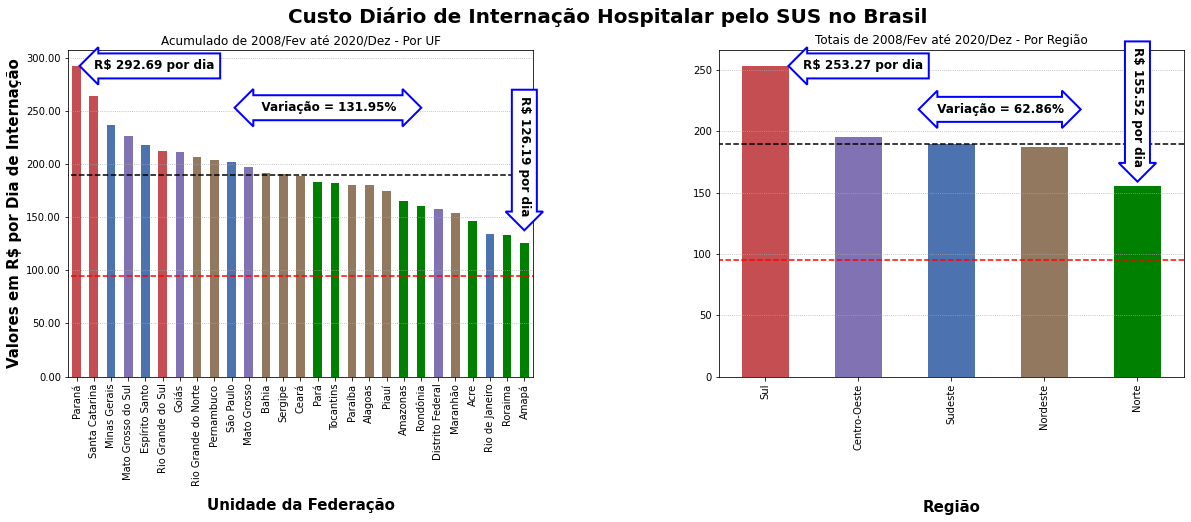

In [37]:
fig6, (ax11,ax12) = plt.subplots(1,2,figsize=(20,6))
fig6.suptitle('Custo Diário de Internação Hospitalar pelo SUS no Brasil',
             fontsize=20, fontweight='bold')

maior_estado_cd=custo_dia['Total'].idxmax()
val_maior_estado_cd=custo_dia.loc[maior_estado_cd]['Total']
str_maior_estado_cd='R$ {:,.2f}'.format(val_maior_estado_cd)+' por dia'
menor_estado_cd=custo_dia['Total'].idxmin()
val_menor_estado_cd=custo_dia.loc[menor_estado_cd]['Total']
str_menor_estado_cd='R$ {:,.2f}'.format(val_menor_estado_cd)+' por dia'

var_maior_menor_cd=(val_maior_estado_cd/val_menor_estado_cd)-1
str_var_cd='   Variação = '+'{:,.2%}'.format(var_maior_menor_cd)+'   '

maior_rg_cd=custo_dia_rg['Total'].sort_values(ascending=False).idxmax()
valor_maior_rg_cd=custo_dia_rg['Total'][maior_rg_cd]
str_maior_rg_cd='R$ {:,.2f}'.format(valor_maior_rg_cd)+' por dia'
menor_rg_cd=custo_dia_rg['Total'].sort_values(ascending=False).idxmin()
valor_menor_rg_cd=custo_dia_rg['Total'][menor_rg_cd]
str_menor_rg_cd='R$ {:,.2f}'.format(valor_menor_rg_cd)+' por dia'

var_max_min_rg_cd=(valor_maior_rg_cd/valor_menor_rg_cd)-1
str_var_rg_cd=' Variação = '+'{:,.2%}'.format(var_max_min_rg_cd)+' '

#Estabelecer cores das barras das UFs
cores_esq=[]
for i in custo_dia['Total'].sort_values(ascending=False).index:
    if custo_dia.loc[i,'Região']=='Sul':
        cores_esq=cores_esq+['#C44E52']
    elif custo_dia.loc[i,'Região']=='Sudeste':
        cores_esq=cores_esq+['#4C72B0']
    elif custo_dia.loc[i,'Região']=='Nordeste':
        cores_esq=cores_esq+['#937860']
    elif custo_dia.loc[i,'Região']=='Centro-Oeste':
        cores_esq=cores_esq+['#8172B3']
    elif custo_dia.loc[i,'Região']=='Norte':
        cores_esq=cores_esq+['green']
    else:
        cores_esq=cores_esq+['black']

cores_dir=[]
for i in custo_dia_rg['Total'].sort_values(ascending=False).index:
    if i=='Sul':
        cores_dir=cores_dir+['#C44E52']
    elif i=='Sudeste':
        cores_dir=cores_dir+['#4C72B0']
    elif i=='Nordeste':
        cores_dir=cores_dir+['#937860']
    elif i=='Centro-Oeste':
        cores_dir=cores_dir+['#8172B3']
    elif i=='Norte':
        cores_dir=cores_dir+['green']
    else:
        cores_dir=cores_dir+['black']

#Gráfico Esquerda
ax11=custo_dia['Total'].sort_values(
    ascending=False).plot(kind='bar', ax=ax11,
                          color=cores_esq)
ax11.set_title('Acumulado de 2008/Fev até 2020/Dez - Por UF')
ax11.grid(color='darkgrey',linestyle=':',axis='y')
ax11.yaxis.set_major_formatter(
    ticker.StrMethodFormatter('{x:,.2f}'))
ax11.set_xlabel('Unidade da Federação', labelpad=12,
               fontweight='bold', fontsize=15)
ax11.set_ylabel('Valores em R$ por Dia de Internação',fontweight='bold', fontsize=15)
ax11.hlines(y=custo_dia['Total'].sort_values(ascending=False).mean(),
           xmin=-10,xmax=100,color='black', linestyle='--')
ax11.hlines(y=custo_dia['Total'].sort_values(ascending=False).mean()/2,
           xmin=-10,xmax=100,color='red', linestyle='--')

t11_max = ax11.text(
    1, val_maior_estado_cd, str_maior_estado_cd,
    fontweight='bold', fontsize=12,
    ha='left', va='center',
    bbox=dict(boxstyle='larrow,pad=0.5',
              facecolor='white',ec='blue', lw=2))
t11_min = ax11.text(
    26, val_menor_estado_cd+25, str_menor_estado_cd,
    fontweight='bold', fontsize=12,
    rotation=270, ha='center', va='bottom',
    bbox=dict(boxstyle='rarrow,pad=0.5',
              facecolor='white',ec='blue', lw=2))
t11_var=ax11.text(
    10,250,str_var_cd,
    fontweight='bold', fontsize=12,
    bbox=dict(
        boxstyle='darrow,pad=0.5',
        facecolor='white',ec='blue',lw=2))

#Gráfico Direita
ax12=custo_dia_rg['Total'].sort_values(ascending=False).plot(
    kind='bar', ax=ax12,color=cores_dir)
ax12.set_title('Totais de 2008/Fev até 2020/Dez - Por Região')
ax12.grid(color='darkgrey',linestyle=':',axis='y')
ax12.yaxis.set_major_formatter(
    ticker.StrMethodFormatter('{x:,.0f}'))
ax12.set_xlabel('Região', labelpad=50,
               fontweight='bold', fontsize=15)
ax12.hlines(y=custo_dia['Total'].mean(),
           xmin=-10,xmax=100,color='black', linestyle='--')
ax12.hlines(y=custo_dia['Total'].mean()/2,
           xmin=-10,xmax=100,color='red', linestyle='--')

t12_max = ax12.text(
    0.4, valor_maior_rg_cd, str_maior_rg_cd,
    fontweight='bold', fontsize=12,
    ha='left', va='center',
    bbox=dict(boxstyle='larrow,pad=0.5',
              facecolor='white',ec='blue', lw=2))
t12_min = ax12.text(
    4, valor_menor_rg_cd+15, str_menor_rg_cd,
    fontweight='bold', fontsize=12,
    rotation=270, ha='center', va='bottom',
    bbox=dict(boxstyle='rarrow,pad=0.5',
              facecolor='white',ec='blue', lw=2))
t12_var=ax12.text(
    1.8,215,str_var_rg_cd,
    fontweight='bold', fontsize=12,
    bbox=dict(
        boxstyle='darrow,pad=0.5',
        facecolor='white',ec='blue',lw=2))

plt.subplots_adjust(wspace=0.4) 
plt.show()

Essa hipótese foi confirmada e justifica, mas não explica, parte da disparidade de gastos entre as UFs. Novamente temos alguns estados do Sul liderando a lista, mas chama a atenção termos São Paulo apenas ligeiramente acima da média e o Rio de Janeiro entre os 3 menores valores de custo diário.

## **CONCLUSÃO**
---

A ideia desse desafio era analisar dados do mundo real, tendo que enfrentar as dificuldades de encontrar dados de difícil acesso e manejo, inconsistentes, com *gaps* de continuidade e problemas similares.

Eu tinha baixas expectativas e acabei me surpreendendo positivamente com a disponibilidade dos dados encontrados no DataSUS. Não tenho como atestar a veracidade dos dados, mas esperava encontrar mais lacunas e dados faltantes do que efetivamente encontrei.

Em relação ao desafio proposto de usar outras informações disponíveis na internet para trabalhar os dados de valores gastos, optei por usar somente os dados do DataSUS e tentar encontrar explicações para as variações de valores absolutos que encontramos nas etapas mais preliminares de investigação que realizamos durante as aulas do Módulo 1.

Acredito que parte das discrepâncias foi explicada pelas variações de população e quantidades de internações de cada UF, mas ainda existe espaço para investigar mais e tentar buscar a razão para termos grandes variações no custo diário das internações hospitalares em diferentes estados.

A diferença de custo pode ser explicada pela diferença de complexidade dos tratamentos ou pelo custo da mão de obra especializada, maiores nas regiões Sul e Sudeste? Essas perguntas não foram respondidas nesse estudo, mas podem ser objeto de uma próxima pesquisa.

Outro ponto que precisa ser avaliado com mais profundidade é a tendência de crescimento dos gastos. Apesar de inicialmente vermos uma curva crescente, estamos falando de um longo período de tempo e os valores estão sem correção monetária. Cabe uma investigação do comportamento dos valores ao aplicarmos o IPCA na série de valores.

## **Agradecimento**
---

Agradeço à Alura e a toda a Equipe que tanto se empenhou na criação desse módulo inicial e seus desafios instigantes. O aprendizado se torna muito mais fluido e de fácil assimilação.
Que venha o módulo 2!

# **APÊNDICE**

---
---

Aproveitando o restante de prazo disponível para a postagem desse projeto, resolvi aproveitar e fazer a indexação dos valores de atendimento pelo IPCA, para verificar se a ideia de que os valores gastos com internações hospitalares pelo SUS estão em crescimento como foi a impressão inicial ao avaliarmos os dados durante a fase de **Análise Preliminar dos Dados**.

Para isso, baixei a série histórica com os dados de IPCA do *site* do IBGE ([link](https://www.ibge.gov.br/estatisticas/economicas/precos-e-custos/9256-indice-nacional-de-precos-ao-consumidor-amplo.html?=&t=downloads)), preparei uma planilha em Excel com o fator de correção a ser aplicado a cada mês dentro do intervalo de datas que estamos trabalhando (de 2008/Fev até 2020/Dez), coloquei no repositório e estou importando aqui.

In [38]:
url_serie_ipca='https://github.com/gcochlar/Bootcamp_DataScience/raw/main/dados/IPCA.csv'

ipca=pd.read_csv(url_serie_ipca, sep=';', header=0,
                 names=['Mês','Fator de Correção'], 
                encoding='ISO-8859-1',decimal=',',thousands='.',
                engine='python')

ipca=ipca.reset_index().set_index('Mês').drop('index', axis=1)
ipca['Fator de Correção']=ipca['Fator de Correção'].astype(float)
ipca=ipca.T
ipca

Mês,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez
Fator de Correção,2.02,2.01,2.01,1.99,1.98,1.96,1.95,1.95,1.94,1.93,1.93,1.92,1.91,1.90,1.90,1.89,1.88,1.87,1.87,1.87,1.86,1.86,1.85,1.84,1.83,1.81,1.81,1.80,1.79,1.79,1.79,1.79,1.78,1.77,1.75,1.74,1.73,1.71,1.70,1.69,...,1.15,1.14,1.14,1.14,1.13,1.13,1.12,1.12,1.12,1.12,1.10,1.10,1.10,1.09,1.09,1.09,1.09,1.09,1.08,1.07,1.07,1.07,1.07,1.06,1.06,1.06,1.06,1.06,1.05,1.04,1.04,1.04,1.04,1.05,1.04,1.04,1.04,1.03,1.02,1.01


Vamos agora indexar a nossa base de gastos com atendimentos e plotar um gráfico inicial, para termos uma primeira ideia do comportamento dos valores indexados.

In [39]:
base_corrig=df_atends.drop('Região', axis=1)

for i in base_corrig.index:
    val_corrig=base_corrig.T[i].values*ipca.T['Fator de Correção'].values
    base_corrig.T[i]=val_corrig

base_corrig.sample(5)

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez
UF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rio de Janeiro,"29,034,994.26","22,853,477.08","41,565,468.09","61,660,386.86","87,278,973.15","87,124,846.16","83,035,050.43","83,905,205.18","86,576,900.32","79,995,114.00","82,933,470.56","117,033,632.61","77,799,055.11","100,366,097.61","92,880,513.54","96,708,857.35","107,662,886.43","100,237,062.53","95,806,218.64","90,520,401.81","90,675,382.32","92,315,184.02","82,144,951.60","103,181,526.25","82,000,932.93","98,861,339.34","141,059,078.15","100,585,243.28","91,944,260.52","96,302,459.57","103,430,490.40","96,007,969.45","93,164,801.16","88,698,915.88","89,104,742.00","128,763,937.37","105,519,025.35","94,750,256.31","94,804,201.91","99,590,771.04",...,"78,832,038.02","83,697,708.36","79,018,840.63","76,541,501.54","81,945,219.54","73,371,204.20","83,668,599.32","83,762,338.33","89,002,336.35","84,822,208.59","85,513,087.90","86,705,042.87","80,132,864.97","86,665,709.37","80,644,632.80","77,334,857.79","86,847,288.83","80,571,177.97","81,221,988.10","82,546,707.38","88,284,909.67","83,923,658.59","94,038,919.70","89,008,775.57","86,718,430.72","87,787,779.41","79,458,449.03","79,447,059.56","84,044,342.07","76,291,311.69","77,608,335.65","72,191,464.30","93,573,362.07","92,266,211.75","100,177,008.13","93,423,675.65","84,991,359.11","83,093,206.57","84,672,142.89","91,790,011.12"
Pernambuco,"5,293,115.87","13,531,389.95","24,509,537.60","51,404,304.91","57,276,028.30","60,858,108.69","61,943,517.34","59,819,525.36","60,560,602.13","59,755,682.79","57,363,578.01","113,141,610.82","57,468,098.43","70,508,674.92","66,143,325.46","68,240,914.64","64,987,287.68","66,167,228.01","69,473,816.12","66,962,578.47","68,419,054.21","63,551,433.88","60,936,569.53","146,999,657.87","58,847,252.66","72,060,958.17","68,498,673.54","80,531,318.35","64,833,193.40","64,227,910.42","71,702,297.24","68,246,518.88","70,116,718.20","66,808,896.77","66,769,172.61","71,643,084.82","65,649,976.92","72,153,226.42","70,185,012.60","73,344,382.15",...,"73,306,682.12","79,133,816.12","71,951,474.05","69,855,342.45","75,533,776.23","66,859,875.53","74,204,835.10","76,203,239.69","79,802,430.87","74,703,605.02","74,696,712.24","79,097,363.92","70,134,465.17","75,713,040.37","70,397,017.55","67,766,889.28","73,712,746.78","67,877,178.89","70,304,070.70","70,994,382.69","77,875,213.09","71,059,116.40","76,062,199.00","76,355,153.82","75,423,129.91","76,019,169.13","72,732,864.61","68,573,016.65","72,786,076.51","65,260,117.21","62,087,156.19","56,504,115.04","69,236,564.00","74,528,919.03","76,986,198.59","79,165,532.51","76,768,739.68","74,622,756.44","73,428,021.46","78,928,528.74"
Roraima,"171,717.97","255,674.30","969,057.27","1,427,715.84","1,856,523.26","1,972,607.46","2,042,214.22","1,955,560.83","2,050,220.56","2,366,300.00","2,383,503.48","2,280,262.27","2,116,220.94","2,706,734.93","2,616,209.45","2,577,301.13","2,532,852.45","2,569,416.93","2,859,928.10","2,937,266.02","2,825,892.84","2,967,352.00","2,842,654.36","2,981,141.84","2,656,272.32","3,297,609.44","3,097,760.85","3,471,513.68","3,305,303.20","3,355,602.56","3,657,081.89","3,465,205.86","3,126,299.65","2,697,987.15","2,600,352.37","2,792,375.81","2,105,535.29","2,184,595.65","2,343,811.63

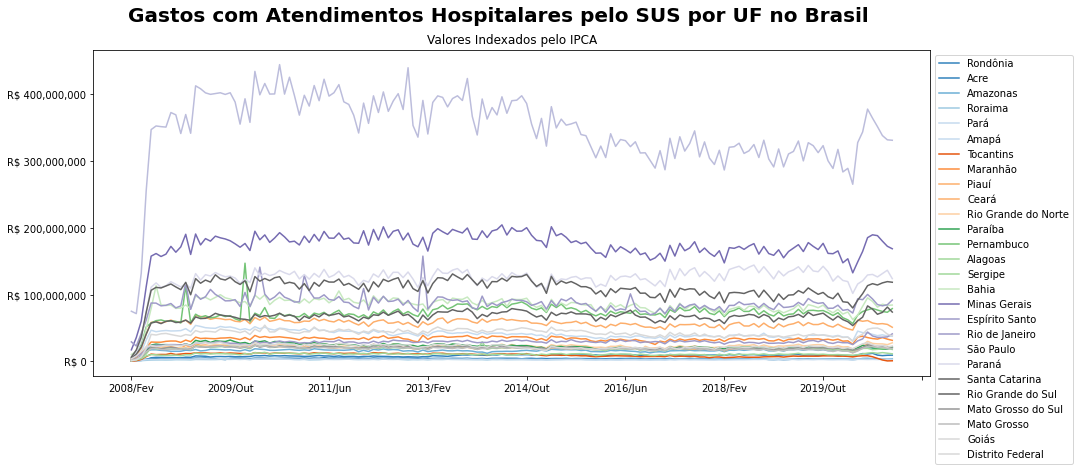

In [40]:
ax=base_corrig.T.plot(figsize=(15,6),cmap='tab20c')
ax.legend(bbox_to_anchor=(1,1),
          loc='upper left', ncol=1)
plt.suptitle('Gastos com Atendimentos Hospitalares pelo SUS por UF no Brasil', fontsize=20, fontweight='bold')
plt.title('Valores Indexados pelo IPCA')
ax.yaxis.set_major_formatter(
    ticker.StrMethodFormatter('R$ {x:,.0f}'))

plt.show()

Tirando uma pequena distorção inicial nos primeiros meses de 2008, que já vimos anteriormente que deve ter sido causada pela migração do sistema utilizado pelo DataSUS, os valores indexados nos passam uma impressão maior de estabilidade, talvez até de uma pequena queda, dependendo da UF.

Vamos anualizar os dados corrigidos e fazer uma comparação de anos completos e fechados, para confirmar nossa impressão inicial. Para isso, vamos usar os anos de 2009 e 2019, evitando comparar com 2020 que sofreu efeitos da pandemia de Corona Vírus.

In [41]:
base_graf=pd.DataFrame()

base_graf['2009']=base_corrig.loc[:,'2009/Jan':'2009/Dez'].sum(axis=1)
base_graf['2019']=base_corrig.loc[:,'2019/Jan':'2019/Dez'].sum(axis=1)
base_graf['Var%']=base_graf['2019']/base_graf['2009']-1

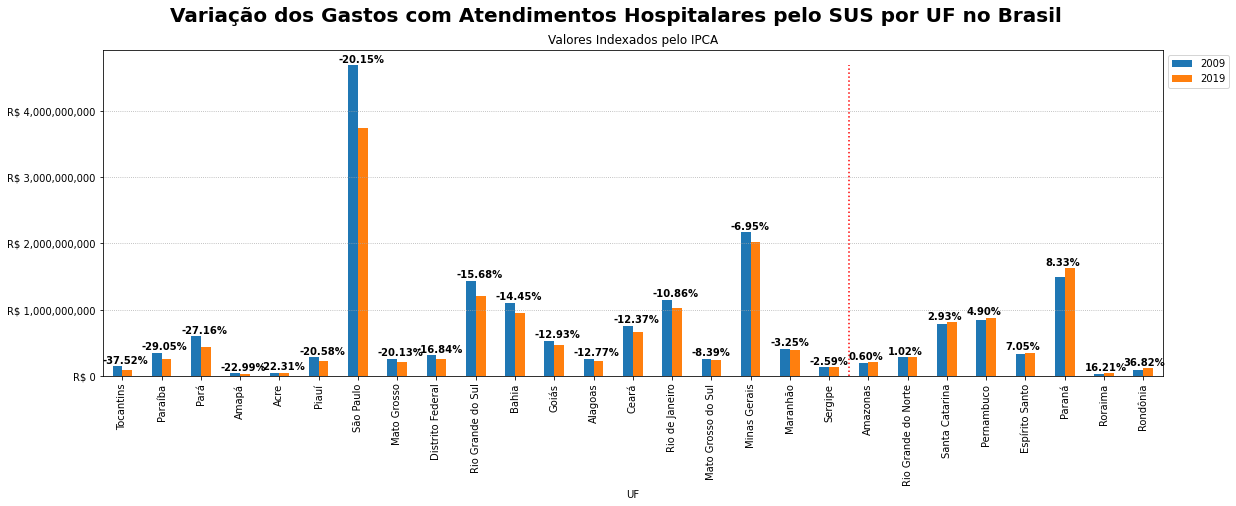

In [42]:
ax_ap=base_graf.sort_values('Var%',ascending=True).drop('Var%',axis=1).plot(kind='bar',figsize=(19,6))
ax_ap.legend(bbox_to_anchor=(1,1),
          loc='upper left', ncol=1)
ax_ap.grid(color='darkgrey',linestyle=':',axis='y')
plt.suptitle('Variação dos Gastos com Atendimentos Hospitalares pelo SUS por UF no Brasil', fontsize=20, fontweight='bold')
plt.title('Valores Indexados pelo IPCA')
ax_ap.yaxis.set_major_formatter(
    ticker.StrMethodFormatter('R$ {x:,.0f}'))
ax_ap.vlines(18.5,0,base_graf.max().max(),colors='red',linestyles='dotted')

j=0
for i in base_graf.sort_values('Var%',ascending=True).index:
    ax_ap.annotate('{:.2%}'.format(base_graf.loc[i,'Var%']),
                   (j-0.5,base_graf.loc[i].max()+50000000),
                   fontweight='bold')
    j = j+1

plt.show()

Desta vez o gráfico está ordenado de acordo com o percentual de variação que os gastos de cada UF tiveram entre os anos de 2009 e 2019.

Podemos ver à esquerda da linha vermelha pontilhada todas as UFs que tiveram redução nos valores gastos. À direita temos apenas 8 UFs que apresentaram crescimento dos valores gastos.

## **Conclusão Relâmpago**
---

Apesar da ideia inicial de que os valores gastos pelas UFs vinha em constante crescimento, podemos ver, ao aplicar a correção inflacionária, que isso não procede. A maior parte das UFs tem reduzido seus valores gastos com atendimentos hospitalares no período analisado.

É importante termos em vista a aplicação de índices inflacionários quando lidamos com grandes períodos de tempo. Mesmo considerando que atualmente não enfrentamos uma inflação elevada, no período analisado a variação é superior a 100%, distorcendo uma avaliação preliminar de que os valores vinham crescendo regularmente.